# I Perkenalan

=================================================

Nama  : Gieorgie Kharismatik Kosasih

Dataset : [Data](https://www.kaggle.com/datasets/dianaddx/employee-data-analysis/data?select=employee_survey_data.csv)

Deployment : [Huggingface](https://huggingface.co/spaces/Gieorgie/Employee_Attrition_Prediction)


=================================================

## Latar Belakang

Di era persaingan bisnis yang semakin ketat, perusahaan perlu mengoptimalkan manajemen sumber daya manusia mereka untuk mempertahankan karyawan berbakat. Tingkat turnover karyawan yang tinggi dapat berdampak negatif pada produktivitas, biaya operasional, dan moral tim. Analisis data karyawan melalui pendekatan machine learning dapat memberikan wawasan yang mendalam tentang faktor-faktor yang mempengaruhi keputusan karyawan untuk meninggalkan perusahaan. Dengan demikian, perusahaan dapat mengambil tindakan proaktif untuk mengurangi tingkat attrition dan menciptakan lingkungan kerja yang lebih stabil dan memotivasi.

## Problem

Perusahaan sering kali menghadapi tantangan dalam memprediksi karyawan mana yang berisiko meninggalkan perusahaan. Data karyawan yang tersedia mencakup berbagai atribut seperti kepuasan kerja, penilaian kinerja, dan informasi demografis. Namun, mengidentifikasi pola dan faktor utama yang menyebabkan karyawan keluar bisa sangat kompleks tanpa alat analisis yang tepat. Masalah utama yang dihadapi adalah bagaimana memanfaatkan data ini secara efektif untuk memprediksi turnover karyawan dan memungkinkan perusahaan untuk mengambil tindakan pencegahan yang tepat.

## Objective

Tujuan dari proyek ini adalah untuk mengembangkan model machine learning yang dapat memprediksi apakah seorang karyawan akan meninggalkan perusahaan berdasarkan data survei karyawan dan data terkait lainnya. Proyek ini memiliki beberapa tujuan spesifik:

- Menggunakan teknik machine learning untuk mengembangkan model klasifikasi yang dapat memprediksi status keluar atau tidaknya seorang karyawan.
- Mengidentifikasi atribut-atribut karyawan yang paling berpengaruh terhadap keputusan untuk keluar, sehingga perusahaan dapat memahami faktor risiko utama.
- Fokus pada peningkatan metrik recall dalam evaluasi model, karena recall penting bagi perusahaan untuk mengidentifikasi sebanyak mungkin karyawan yang berisiko keluar guna mengurangi turnover.
- Memberikan rekomendasi berbasis data kepada manajemen perusahaan untuk mengurangi tingkat attrition dan meningkatkan retensi karyawan.

Dengan mencapai tujuan-tujuan ini, perusahaan dapat mengurangi biaya yang berkaitan dengan turnover karyawan, mempertahankan karyawan berharga, dan meningkatkan kinerja serta kepuasan kerja di seluruh organisasi.

# II Import libraries

In [36]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Statistic
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency

# Data Spliting
from sklearn.model_selection import train_test_split

# Model
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# imbalance
from imblearn.over_sampling import SMOTENC

# Pipeline
from imblearn.pipeline import Pipeline

# Transformer
from sklearn.compose import ColumnTransformer

# Scalling
from sklearn.preprocessing import RobustScaler,OneHotEncoder,OrdinalEncoder

# Metric Evaluation
from sklearn.metrics import classification_report,confusion_matrix, recall_score

# filter warnings
import warnings
warnings.filterwarnings("ignore")

# Save Model
import pickle
import json

# III Data Loading

In [37]:
# load data
pd.set_option('display.max_columns', None)
gd = pd.read_csv('general_data.csv')
gd.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4


In [38]:
# load data
msd = pd.read_csv('manager_survey_data.csv')
msd.head(5)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [39]:
# load data
esd = pd.read_csv('employee_survey_data.csv')
esd.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


Data bersikan 3 bagian 

In [40]:
# Gabungkan df1 dan df2 berdasarkan EmployeeID
merged_df = pd.merge(gd, msd, on='EmployeeID')

# Gabungkan hasil dari df1 dan df2 dengan df3 berdasarkan EmployeeID
df = pd.merge(merged_df, esd, on='EmployeeID')

order = ['EmployeeID','Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance']

df = df[order]

df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [41]:
# # menyimpan data gabungan
# df.to_csv('Main_Data.csv', index=False)

In [42]:
# Menampilkan jumlah baris dan kolom
print(f'Jumlah baris : {df.shape[0]}')
print(f'Jumlah kolom : {df.shape[1]}')

Jumlah baris : 4410
Jumlah kolom : 29


In [43]:
# Menampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

| **Kolom**                | **Keterangan**                                                                 |
|--------------------------|-------------------------------------------------------------------------------|
| `EmployeeID`             | ID unik untuk setiap karyawan                                                  |
| `Age`                    | Usia karyawan                                                                  |
| `Attrition`              | Apakah karyawan berhenti (Yes) atau tidak (No) pada tahun sebelumnya                                 |
| `BusinessTravel`         | Frekuensi perjalanan bisnis (`Travel_Rarely`, `Travel_Frequently`, `Non-Travel`) |
| `Department`             | Departemen tempat karyawan bekerja (`Sales`, `Research & Development`, `Human Resources`) |
| `DistanceFromHome`       | Jarak dari rumah ke tempat kerja (dalam kilometer)                              |
| `Education`              | Tingkat pendidikan (1=Below College, 2=College, 3=Bachelor, 4=Master, 5=Doctor) |
| `EducationField`         | Bidang pendidikan (`Life Sciences`, `Medical`, `Marketing`, `Technical Degree`, `Other`) |
| `EmployeeCount`          | Jumlah karyawan (konstan, selalu 1)                                             |
| `Gender`                 | Jenis kelamin (`Male`, `Female`)                                                |
| `JobLevel`               | Tingkat pekerjaan karyawan                                                      |
| `JobRole`                | Peran pekerjaan karyawan (`Sales Executive`, `Research Scientist`, dll.)        |
| `MaritalStatus`          | Status pernikahan (`Single`, `Married`, `Divorced`)                             |
| `MonthlyIncome`          | Pendapatan bulanan karyawan                                                     |
| `NumCompaniesWorked`     | Jumlah perusahaan tempat karyawan pernah bekerja                                |
| `Over18`                 | Apakah karyawan berusia lebih dari 18 tahun (`Yes`)                             |
| `PercentSalaryHike`      | Persentase kenaikan gaji                                                        |
| `StandardHours`          | Jam kerja standar (konstan, selalu 8)                                           |
| `StockOptionLevel`       | Level opsi saham yang diberikan kepada karyawan                                 |
| `TotalWorkingYears`      | Total tahun bekerja                                                             |
| `TrainingTimesLastYear`  | Jumlah pelatihan yang diikuti tahun lalu                                        |
| `YearsAtCompany`         | Tahun bekerja di perusahaan saat ini                                            |
| `YearsSinceLastPromotion`| Tahun sejak promosi terakhir                                                    |
| `YearsWithCurrManager`   | Tahun bekerja dengan manajer saat ini                                           |
| `JobInvolvement`         | Tingkat keterlibatan pekerjaan (1=Low, 2=Medium, 3=High, 4=Very High)           |
| `PerformanceRating`      | Penilaian kinerja (1=Low, 2=Good, 3=Excellent, 4=Outstanding)                   |
| `EnvironmentSatisfaction`| Kepuasan terhadap lingkungan kerja (1=Low, 2=Medium, 3=High, 4=Very High)       |
| `JobSatisfaction`        | Kepuasan terhadap pekerjaan (1=Low, 2=Medium, 3=High, 4=Very High)              |
| `WorkLifeBalance`        | Keseimbangan kerja dan kehidupan (1=Bad, 2=Good, 3=Better, 4=Best)              |


In [44]:
# Menghitung missing value pada data
data_null = df.isna().sum().reset_index().rename(columns={'index':'variable',0:'null count'})
# Menghitung presentase missing value pada data
data_null['null percentage'] = data_null['null count'].apply(lambda x: (x/(df.shape[0]))*100)
data_null

,variable,null count,null percentage
0,EmployeeID,0,0.000000
1,Age,0,0.000000
2,Attrition,0,0.000000
3,BusinessTravel,0,0.000000
4,Department,0,0.000000
5,DistanceFromHome,0,0.000000
6,Education,0,0.000000
7,EducationField,0,0.000000
8,EmployeeCount,0,0.000000
9,Gender,0,0.000000


In [45]:

# Menghitung jumlah baris yang mengandung setidaknya satu nilai yang hilang
rows_with_missing = df.isnull().any(axis=1).sum()

# Menghitung persentase baris yang mengandung setidaknya satu nilai yang hilang
percentage_rows_with_missing = (rows_with_missing / len(df)) * 100

# Menampilkan hasil
print(f"Persentase baris yang mengandung missing value: {percentage_rows_with_missing:.2f}%")

Persentase baris yang mengandung missing value: 2.49%


- Missing value terdapat pada kolom `NumCompaniesWorked`, `TotalWorkingYears`, `EnvironmentSatisfaction`, `JobSatisfaction`, dan `WorkLifeBalance`.
- Data yang ada merupakan data survey yang dilakukan perusahaan pada setiap perkerja, maka ada beberapa faktor penyebab missing value ada. Pertama korespondent survey sengaja tidak mengisi bagian bagian tersebut, kedua terdapat kesalahan pengisian data yang dilakukan pihak pembuat survey.
- Jenis missing value yang ada adalah `Missing Completely at Random (MCR)` dimana bersifat independent dan tidak ada keterkaitan dengan data yang lain, sehingga missing value tidak dapat dilakukan input dengan menggunakan kolom lain.
- Dengan mempertimbangkan data jumlah missing value yang ada serta melihat cara pengambilan data maka penanganan missing value ini akan di drop agar tidak menyebabkan intrepretasi yang salah.

In [46]:
# menghapus missing value
df = df.dropna()
len(df)

4300

In [47]:
# Check Duplicates
print('Jumlah data duplikat:', df.duplicated().sum())

Jumlah data duplikat: 0


# IV Exploratory Data Analysis (EDA)

Pada tahapan ini akan dilakukan explorasi dan analisis data untuk mengetahui insight yang ada kemudian melihat korelasi antara kolom dengan target untuk menjadikan landasan dipilihnya fitur yang akan digunakan dalam machine learning.

## Fungsi Visualisasi

In [48]:
# Membuat bar plot distribusi Attrition berdasarkan kolom tertentu.

vis_colors = ['#0072C6', '#BFBFBF']  

def plot_attrition_distribution(df, column, colors=vis_colors):
    
    plt.figure(figsize=(15, 5))
    
    # Plot: Attrition distribution based on the given column
    ax = plt.gca()
    attrition_data = df.groupby([column, 'Attrition']).size().unstack().fillna(0)
    
    # Adjusting the plot type based on the column values
    if len(attrition_data.index) > 3:
        attrition_data.plot(kind='barh', stacked=True, color=colors, ax=ax)
        ax.set_xlabel('Jumlah Karyawan')
        ax.set_ylabel(column)
    else:
        attrition_data.plot(kind='bar', stacked=True, color=colors, ax=ax)
        ax.set_ylabel('Jumlah Karyawan')
        ax.set_xlabel(column)
        ax.set_xticklabels(attrition_data.index, rotation=0)
    
    ax.set_title(f'Distribusi Attrition Berdasarkan {column}')
    ax.legend(title='Attrition', labels=['No', 'Yes'])
    
    # Menambahkan anotasi pada plot
    for container in ax.containers:
        if len(attrition_data.index) > 3:
            labels = [f'{int(v.get_width())}' for v in container]
        else:
            labels = [f'{int(v.get_height())}' for v in container]
        ax.bar_label(container, labels=labels, label_type='center', padding=2)
    
    plt.tight_layout()
    plt.show()

# Membuat histogram distribusi Attrition berdasarkan kolom tertentu.
def plot_attrition_histogram(df, column, colors=vis_colors):
    
    plt.figure(figsize=(15, 5))
    
    attrition_no = df[df['Attrition'] == 'No'][column]
    attrition_yes = df[df['Attrition'] == 'Yes'][column]
    
    sns.histplot(attrition_no, color=colors[0], label='No', kde=False, bins=30)
    sns.histplot(attrition_yes, color=colors[1], label='Yes', kde=False, bins=30)
    
    plt.title(f'Histogram Distribusi {column} Berdasarkan Attrition')
    plt.xlabel(column)
    plt.ylabel('Jumlah Karyawan')
    plt.legend(title='Attrition')
    
    plt.tight_layout()
    plt.show()


## Employee Attrition Distribution

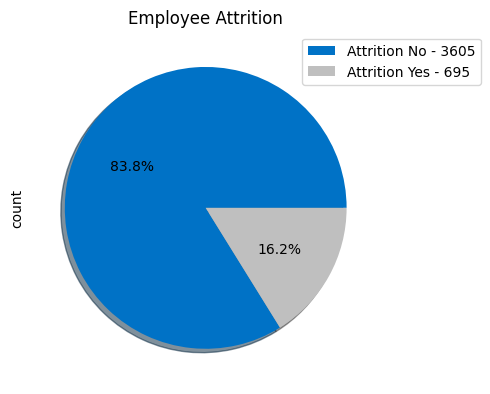

In [49]:
# Menghitung jumlah value unik
target = df['Attrition'].nunique()

# Menghitung jumlah setiap value
target_counts = df['Attrition'].value_counts()

# Membuat label untuk legenda dengan jumlah setiap value
labels = [f'Attrition {i} - {count}' for i, count in target_counts.items()]

# Membuat pie chart
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
target_counts.plot(kind='pie', autopct='%1.1f%%',  shadow=True, labels=None, colors =['#0072C6', '#BFBFBF'])
plt.title('Employee Attrition')

# Menambahkan legenda
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.3, 1))

plt.show()

- Pekerja yang bertahan lebih banyak ketimbang pekerja yang memutuskan keluar dengan presentase `83.8%` dan `16.2%`.
- Data termasuk imbalance dimana proporsi target tidak seimbang, maka untuk mencegah model untuk tidak bias akan dilakukan proses balancing data pada tahapan selanjutnya.

## Employee Demographics

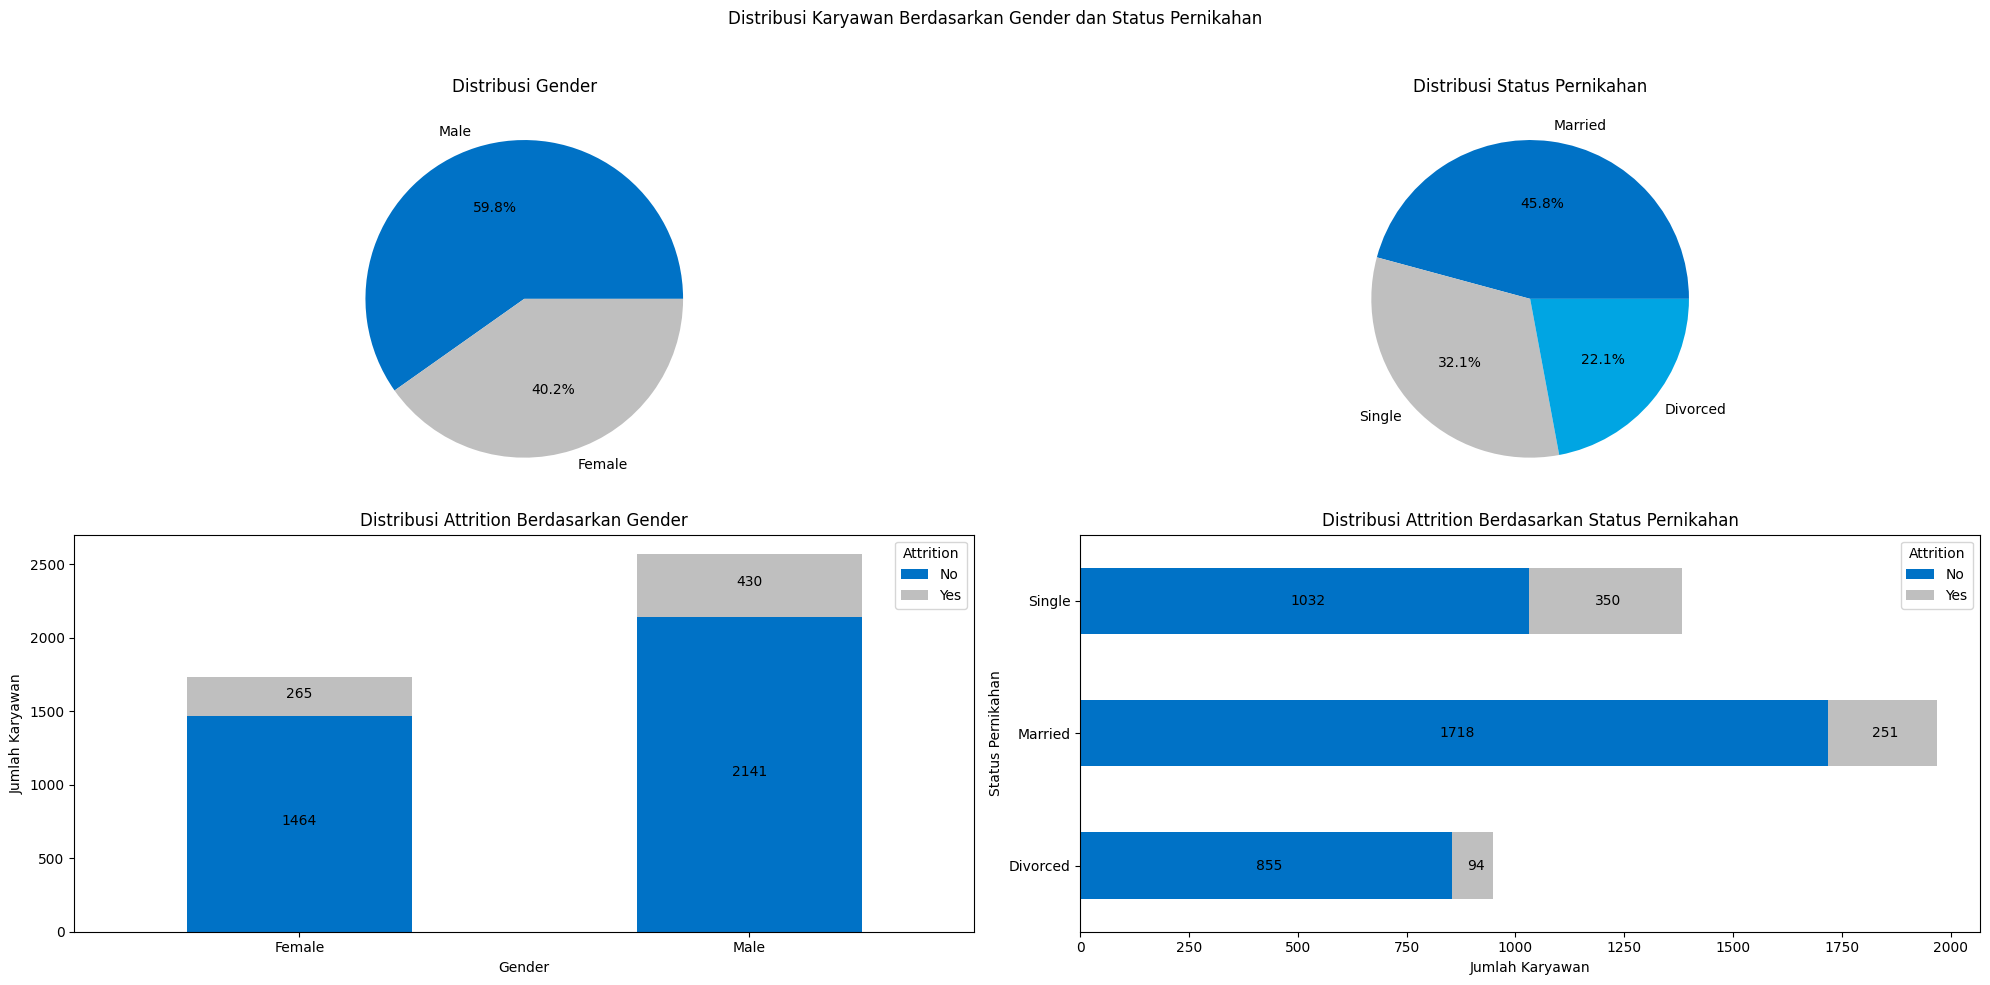

In [55]:
# Warna vis dan tambahan warna lain
vis_colors = ['#0072C6', '#BFBFBF', '#00A5E3', '#7F7F7F']  # biru gelap, abu-abu, biru terang, abu-abu gelap

# Membuat subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Plot 1: Pie chart Gender distribution
axes[0, 0].pie(df['Gender'].value_counts(), labels=['Male','Female'], autopct='%1.1f%%', colors=vis_colors[:2])
axes[0, 0].set_title('Distribusi Gender')

# Plot 2: Pie chart Marital Status distribution
axes[0, 1].pie(df['MaritalStatus'].value_counts(), labels=['Married', 'Single', 'Divorced'], autopct='%1.1f%%', colors=vis_colors[:3])
axes[0, 1].set_title('Distribusi Status Pernikahan')

# Plot 3: Bar chart Gender vs Attrition
ax3 = axes[1, 0]
gender_attrition = df.groupby(['Gender', 'Attrition']).size().unstack().fillna(0)
gender_attrition.plot(kind='bar', stacked=True, color=vis_colors[:2], ax=ax3)
ax3.set_title('Distribusi Attrition Berdasarkan Gender')
ax3.set_ylabel('Jumlah Karyawan')
ax3.set_xlabel('Gender')
ax3.set_xticklabels(['Female','Male'], rotation=0)
ax3.legend(title='Attrition', labels=['No', 'Yes'])

# Menambahkan anotasi pada plot 3
for container in ax3.containers:
    labels = [f'{int(v.get_height())}' for v in container]
    ax3.bar_label(container, labels=labels, label_type='center', padding=2)

# Plot 4: Bar chart Marital Status vs Attrition
ax4 = axes[1, 1]
marital_attrition = df.groupby(['MaritalStatus', 'Attrition']).size().unstack().fillna(0)
marital_attrition.plot(kind='barh', stacked=True, color=vis_colors[:2], ax=ax4)
ax4.set_title('Distribusi Attrition Berdasarkan Status Pernikahan')
ax4.set_ylabel('Status Pernikahan')
ax4.set_xlabel('Jumlah Karyawan')
ax4.set_yticklabels(['Divorced','Married','Single'], rotation=0)
ax4.legend(title='Attrition', labels=['No', 'Yes'])

# Menambahkan anotasi pada plot 4
for container in ax4.containers:
    labels = [f'{int(v.get_width())}' for v in container]
    ax4.bar_label(container, labels=labels, label_type='center', padding=2)

plt.suptitle('Distribusi Karyawan Berdasarkan Gender dan Status Pernikahan')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Grafik-grafik tersebut menunjukkan distribusi karyawan berdasarkan gender dan status pernikahan, serta distribusi attrition (pengunduran diri) berdasarkan kedua faktor tersebut. Dari distribusi gender, terlihat bahwa mayoritas karyawan adalah laki-laki `59.8%` dibandingkan perempuan `40.2%`. Namun, tingkat attrition lebih tinggi pada perempuan `430` dibandingkan laki-laki `265`. Distribusi status pernikahan menunjukkan bahwa sebagian besar karyawan menikah `45.8%`, diikuti oleh yang lajang `32.1%` dan bercerai `22.1%`. Dari segi attrition, karyawan yang bercerai memiliki angka attrition tertinggi `350`, diikuti oleh yang lajang `251` dan yang menikah `94`.


In [ ]:
# Warna vis dan tambahan warna lain
vis_colors = ['#0072C6', '#BFBFBF', '#00A5E3', '#7F7F7F']  # biru gelap, abu-abu, biru terang, abu-abu gelap

# Membuat subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))

# Plot 1: Pie chart Gender distribution
axes[0, 0].pie(df['Gender'].value_counts(), labels=['Female','Male'], autopct='%1.1f%%', colors=vis_colors[:2])
axes[0, 0].set_title('Distribusi Gender')

# Plot 2: Pie chart Marital Status distribution
axes[0, 1].pie(df['MaritalStatus'].value_counts(), labels=['Married', 'Single', 'Divorced'], autopct='%1.1f%%', colors=vis_colors[:3])
axes[0, 1].set_title('Distribusi Status Pernikahan')

# Plot 3: Bar chart Gender vs Attrition
ax3 = axes[1, 0]
gender_attrition = df.groupby(['Gender', 'Attrition']).size().unstack().fillna(0)
gender_attrition.plot(kind='bar', stacked=True, color=vis_colors[:2], ax=ax3)
ax3.set_title('Distribusi Attrition Berdasarkan Gender')
ax3.set_ylabel('Jumlah Karyawan')
ax3.set_xlabel('Gender')
ax3.set_xticklabels(['Male', 'Female'], rotation=0)
ax3.legend(title='Attrition', labels=['No', 'Yes'])

# Menambahkan anotasi pada plot 3
for container in ax3.containers:
    labels = [f'{int(v.get_height())}' for v in container]
    ax3.bar_label(container, labels=labels, label_type='center', padding=2)

# Plot 4: Bar chart Marital Status vs Attrition
ax4 = axes[1, 1]
marital_attrition = df.groupby(['MaritalStatus', 'Attrition']).size().unstack().fillna(0)
marital_attrition.plot(kind='barh', stacked=True, color=vis_colors[:2], ax=ax4)
ax4.set_title('Distribusi Attrition Berdasarkan Status Pernikahan')
ax4.set_ylabel('Status Pernikahan')
ax4.set_xlabel('Jumlah Karyawan')
ax4.set_yticklabels(['Divorced','Single','Married'], rotation=0)
ax4.legend(title='Attrition', labels=['No', 'Yes'])

# Menambahkan anotasi pada plot 4
for container in ax4.containers:
    labels = [f'{int(v.get_width())}' for v in container]
    ax4.bar_label(container, labels=labels, label_type='center', padding=2)

plt.suptitle('Distribusi Karyawan Berdasarkan Gender dan Status Pernikahan')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [52]:
df.lala

AttributeError: 'DataFrame' object has no attribute 'lala'

### Attrition by Age

In [ ]:
#dibuat range umur

bins = [17, 25, 33, 46, 60]

df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=['18-25', '26-33', '34-46', '47-60'])

df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age Category
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,3.0,4.0,2.0,47-60
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,3.0,2.0,4.0,26-33
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,2.0,2.0,1.0,26-33
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,4.0,4.0,3.0,34-46
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,4.0,1.0,3.0,26-33


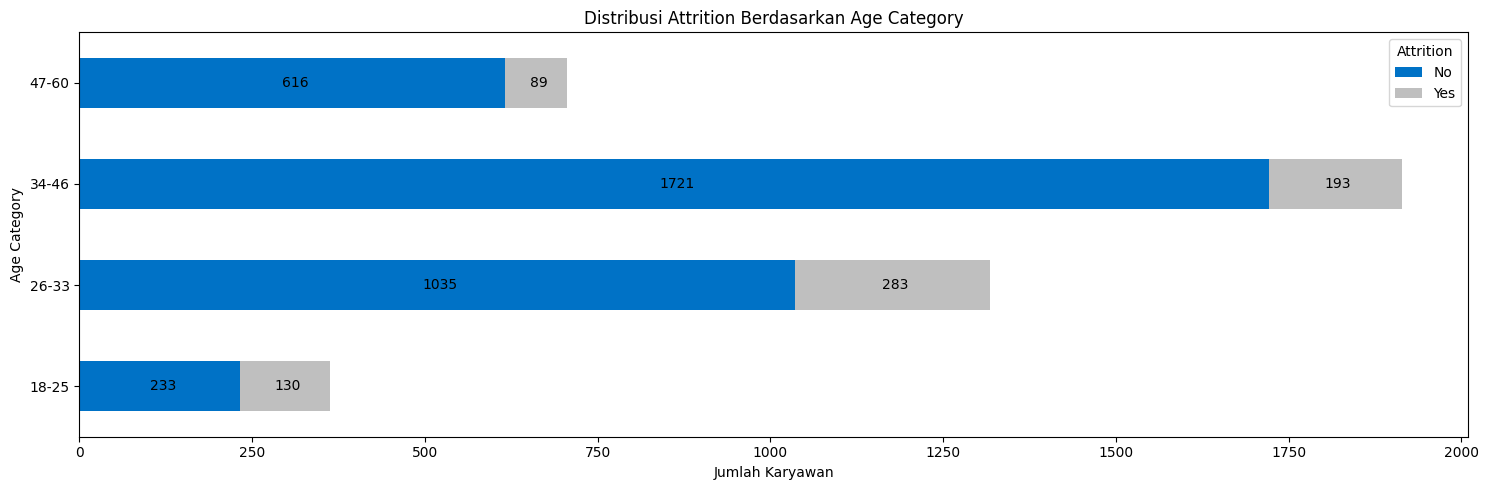

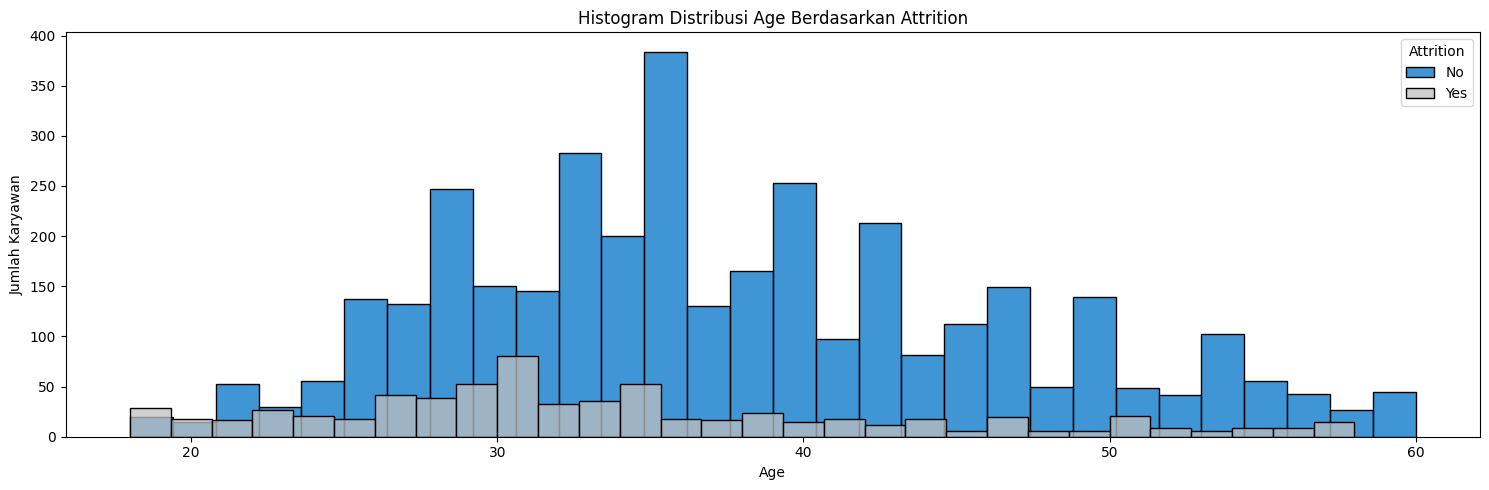

In [ ]:
# plot data
plot_attrition_distribution(df, 'Age Category')
plot_attrition_histogram(df, 'Age')

Grafik diatas menunjukan persebaran data dari umur karyawan, dapat dilihat bahwa rentang umur karyawan dalam data ini mulai dari 18-60. Pada grafik kategori umur karyawan dapat dilihat bahwah rentang umur `18-25 tahun` adalah rentang umur yang paling banyak keluar dari perusahaan bahkan dengan presentase `55%`. Rentang umur `34-46` yang paling sedikit presentase karyawan keluar.

### Attrition by Department

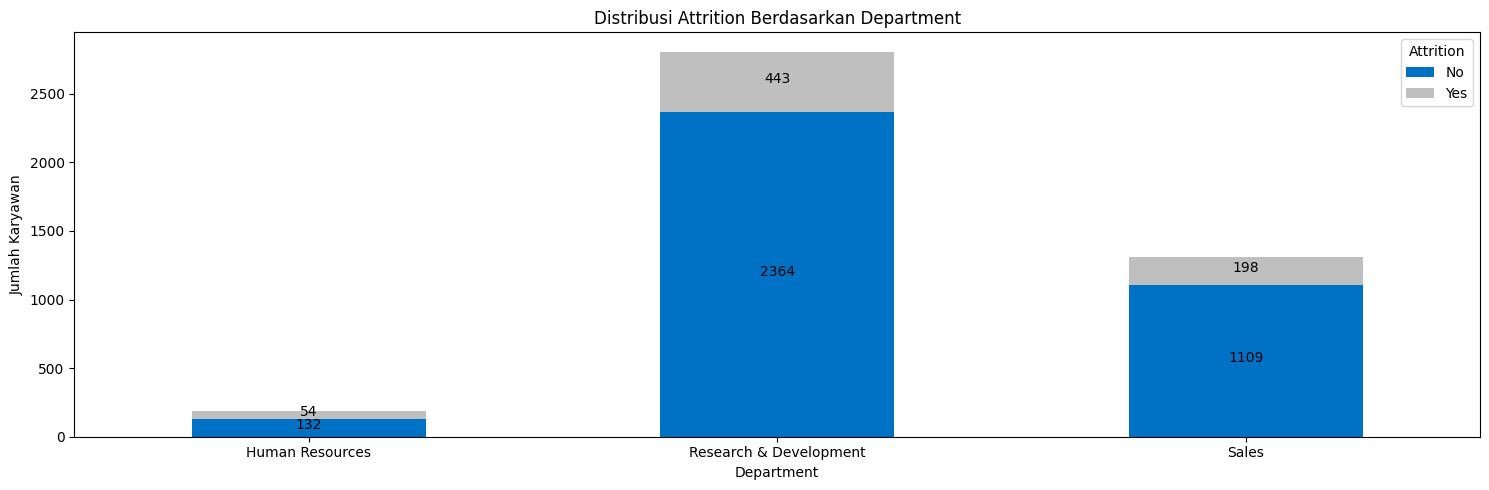

In [ ]:
# plot data
plot_attrition_distribution(df, 'Department')

Departemen yang paling banyak karyawan keluar dari perusahaan jatuh pada depart ment research and development dimana ada `443` karyawan yang keluar dibanding kan department lainnya.

### Attrition by Business Travel

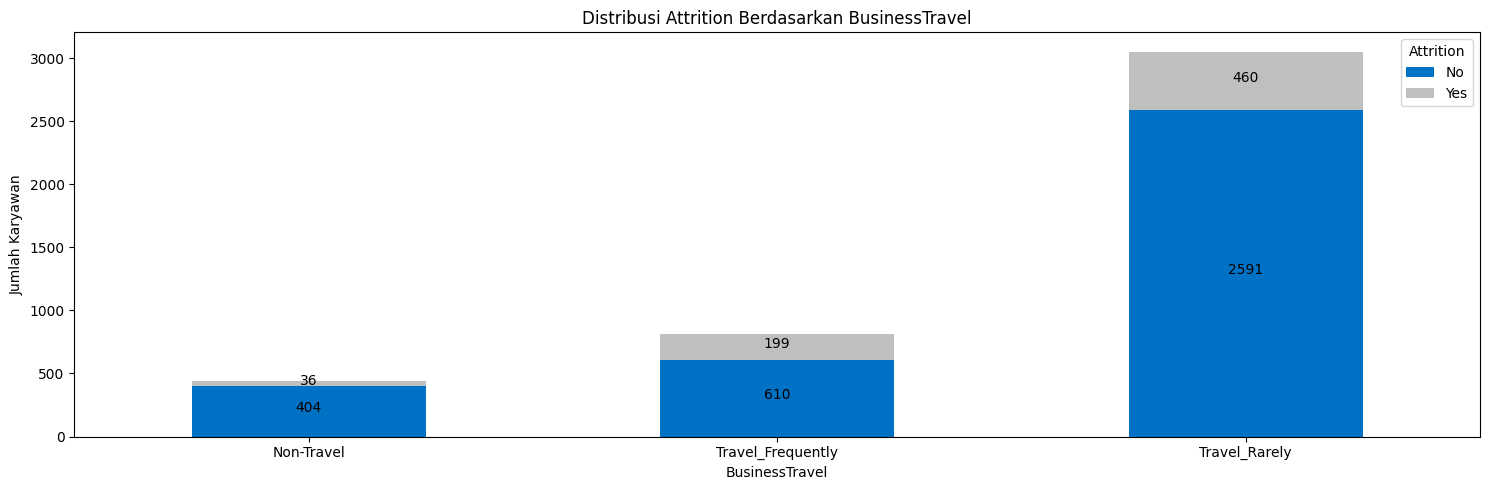

In [ ]:
# plot data
plot_attrition_distribution(df, 'BusinessTravel')

Grafik diatas menunjukan karyawan yang tidak dikirim perjalanan bisnis lebih sedikit presentase orang tersebut untuk keluar dari perusahaan, akan tetapi orang yang sering dikirim untuk melakukan perjalanan bisnis presentasenya lebih banyak yang keluar dari perusahaan dengan nilai presentase sebesar `33%`.

## Attrition by Job

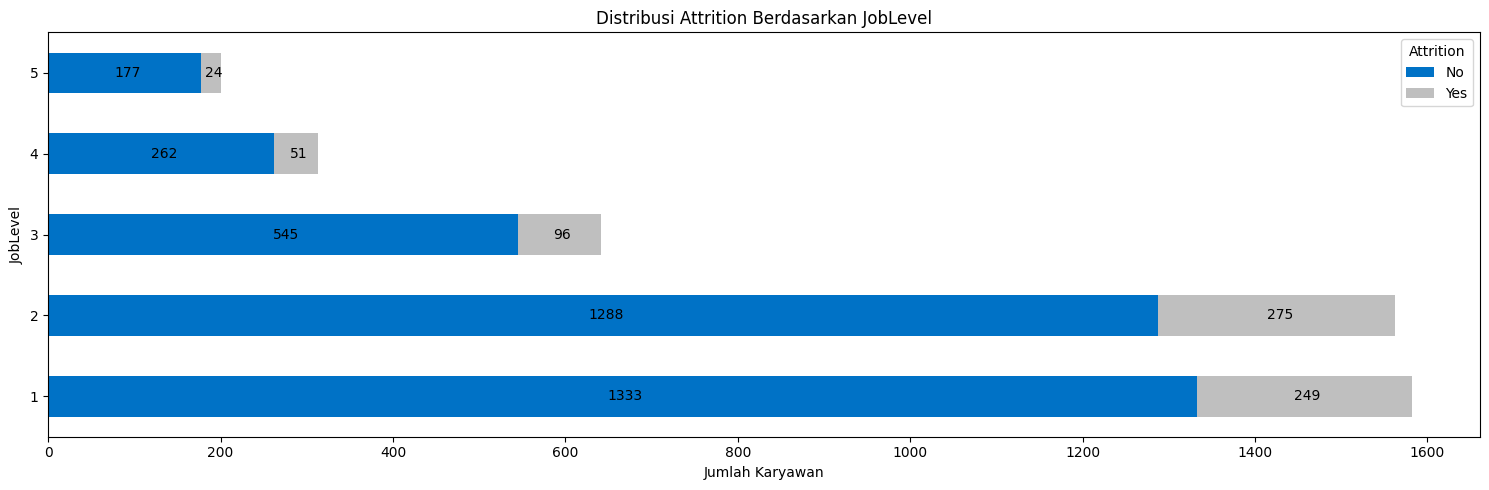

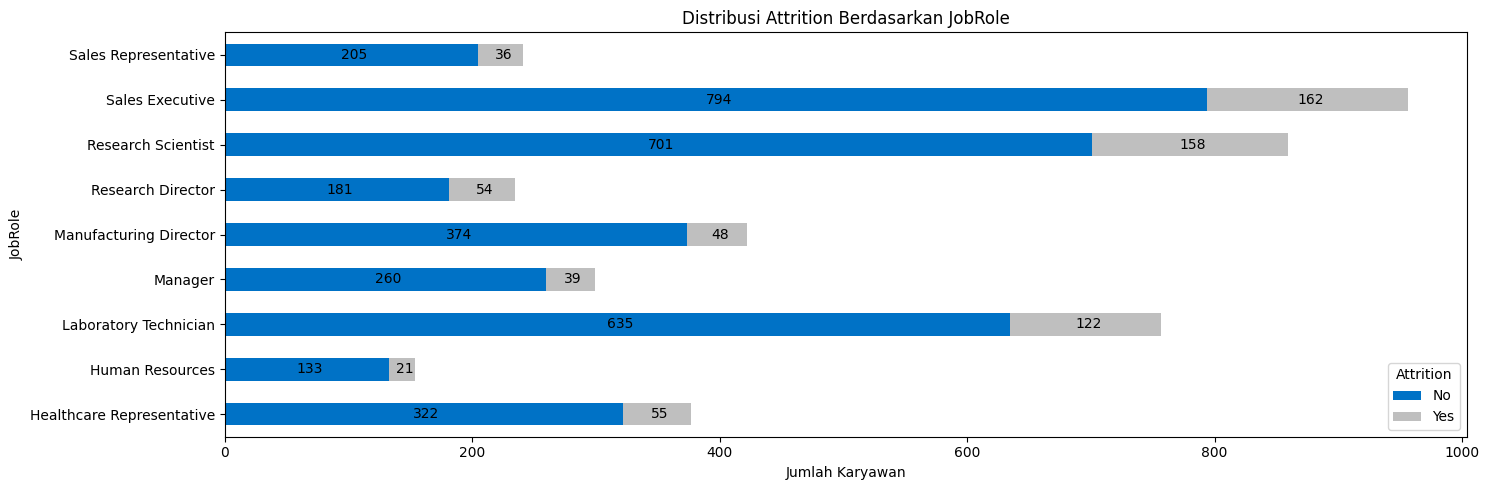

In [ ]:
# plot data
plot_attrition_distribution(df, 'JobLevel')
plot_attrition_distribution(df, 'JobRole')

Grafik-grafik tersebut menunjukkan distribusi attrition karyawan berdasarkan tingkat pekerjaan `job level` dan peran pekerjaan `job role`. Pada grafik distribusi attrition berdasarkan `job level`, terlihat bahwa tingkat attrition tertinggi ada pada level 2 `275` dan level 1 `249`, sementara tingkat attrition terendah ada pada level 5 `24`. Grafik distribusi attrition berdasarkan job role menunjukkan bahwa posisi Sales Executive memiliki tingkat attrition tertinggi `162`, diikuti oleh Research Scientist `158` dan Laboratory Technician `122`. Sebaliknya, posisi Human Resources memiliki tingkat attrition terendah `21`. Hal ini mengindikasikan bahwa attrition karyawan cenderung lebih tinggi pada level pekerjaan yang lebih rendah dan pada posisi tertentu seperti Sales Executive dan Research Scientist, yang mungkin disebabkan oleh berbagai faktor seperti tekanan kerja, peluang karier, dan kepuasan kerja.

## Employee Performance

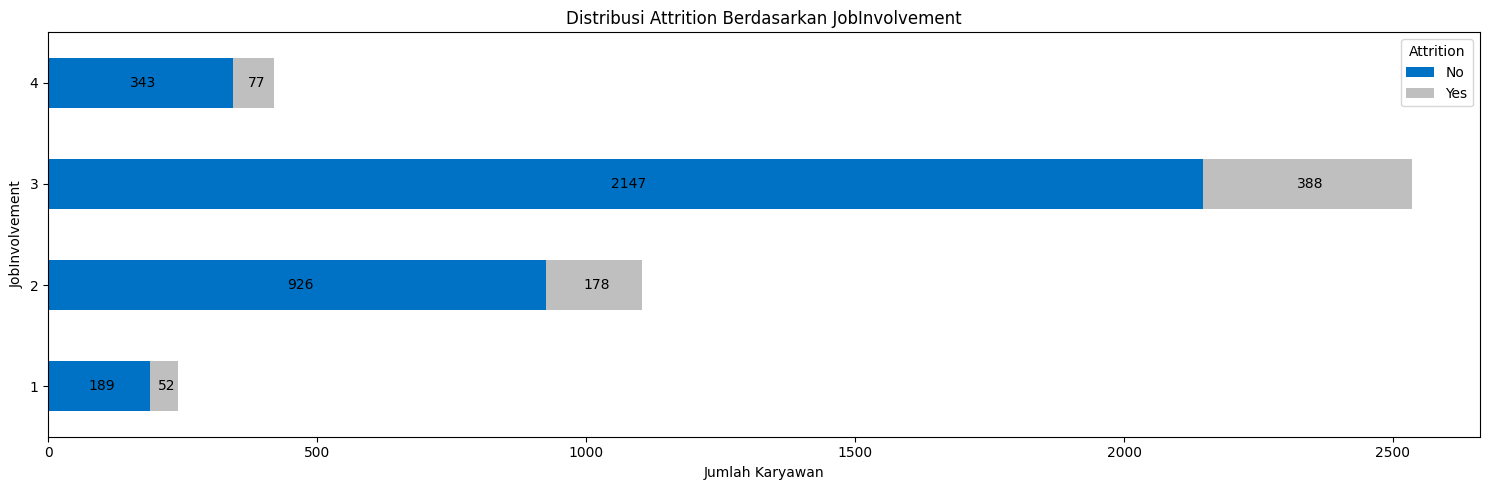

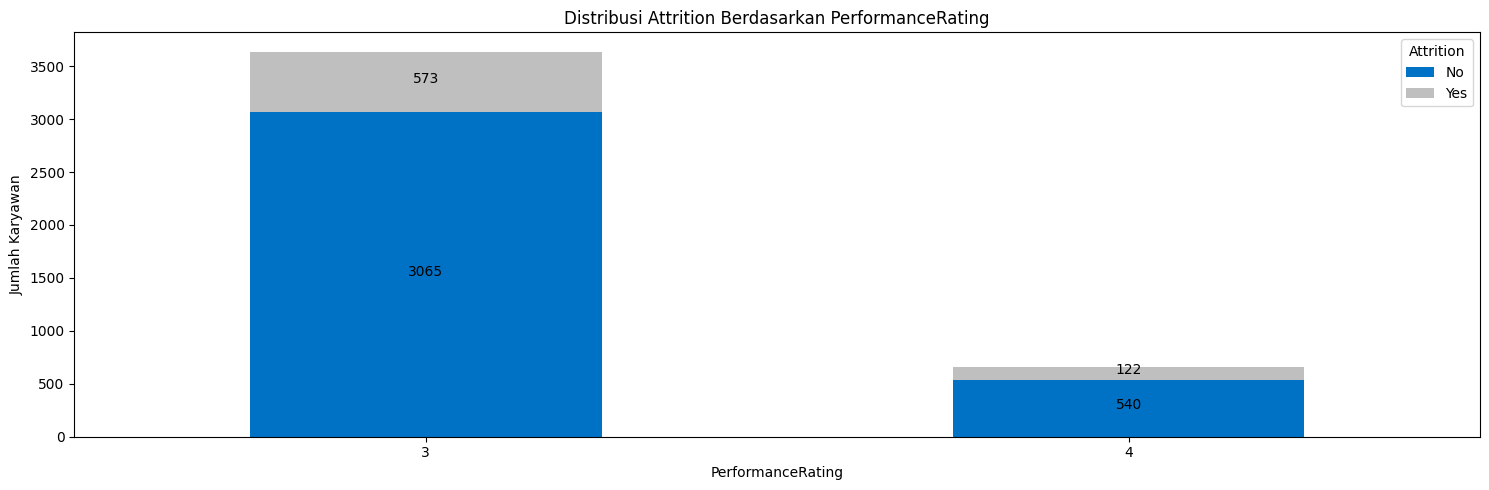

In [ ]:
# plot data
plot_attrition_distribution(df, 'JobInvolvement')
plot_attrition_distribution(df, 'PerformanceRating')

Dari grafik distribusi attrition berdasarkan JobInvolvement dan PerformanceRating, terlihat bahwa keterlibatan dalam pekerjaan dan penilaian kinerja juga berpengaruh terhadap tingkat attrition. Pada JobInvolvement, kategori dengan keterlibatan tertinggi `4` memiliki jumlah attrition terendah `77`, sementara kategori dengan keterlibatan paling rendah `2` memiliki jumlah attrition tertinggi `178`. Hal ini menunjukkan bahwa karyawan dengan keterlibatan pekerjaan yang lebih tinggi cenderung memiliki tingkat attrition yang lebih rendah. Sedangkan pada PerformanceRating, terlihat bahwa karyawan dengan penilaian kinerja lebih tinggi `rating 4` memiliki jumlah attrition yang lebih rendah `122` dibandingkan dengan yang memiliki penilaian kinerja lebih rendah `rating 3` dengan jumlah attrition yang lebih tinggi `573`. Ini menunjukkan bahwa karyawan dengan penilaian kinerja yang lebih baik cenderung lebih sedikit mengalami attrition, mengindikasikan bahwa kinerja yang baik berpotensi mengurangi tingkat attrition.

## Employee Job Stasfaction

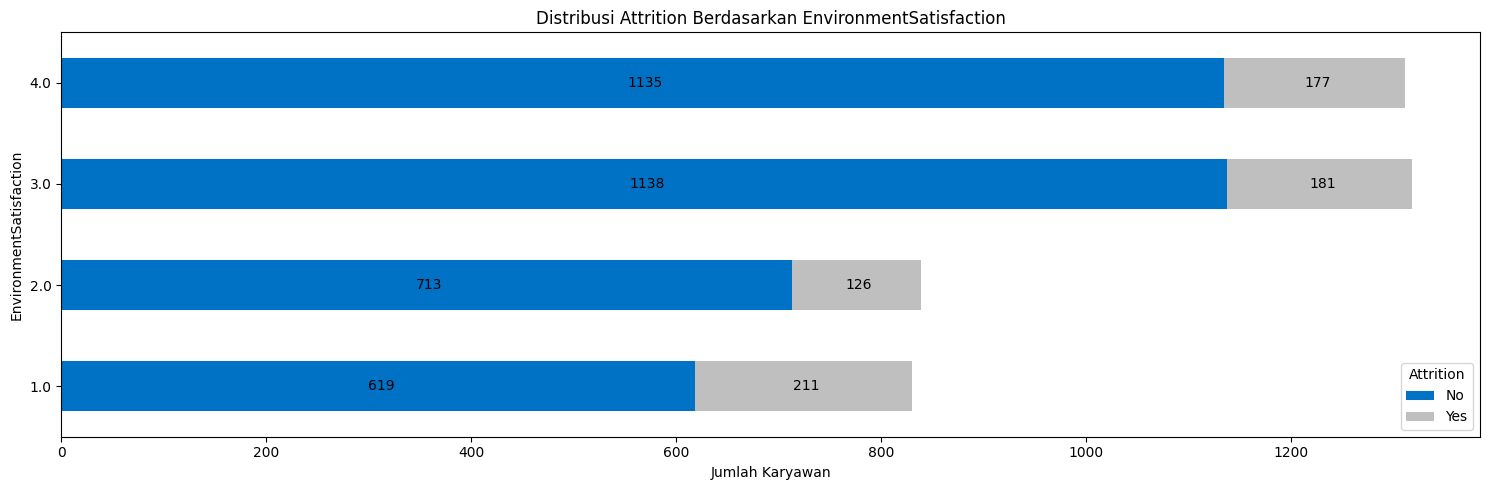

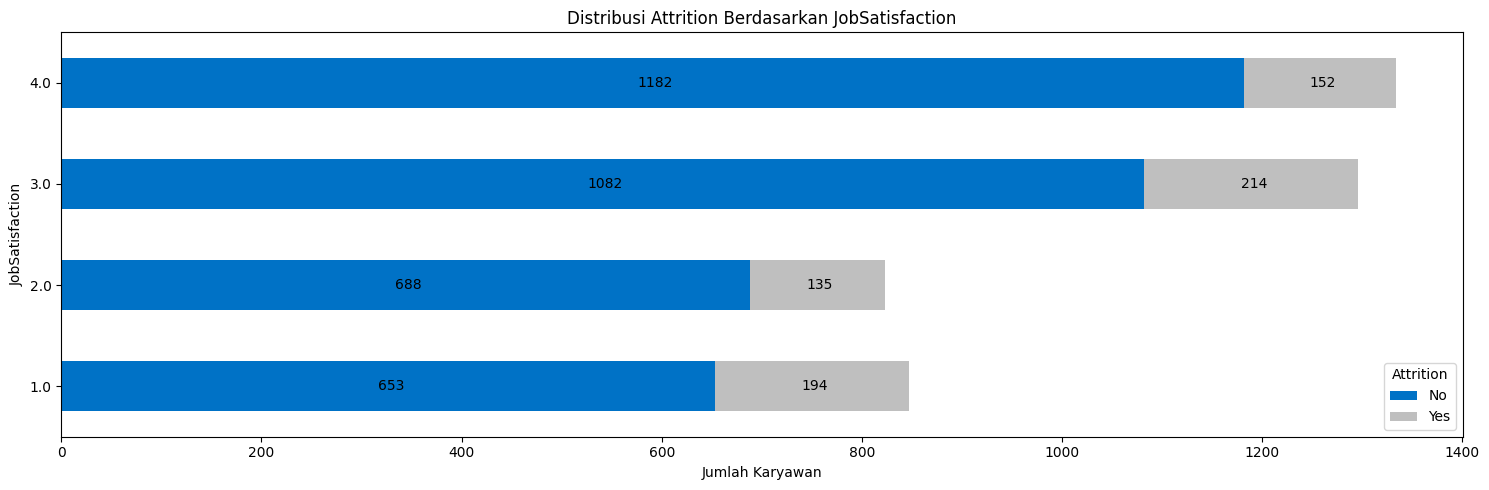

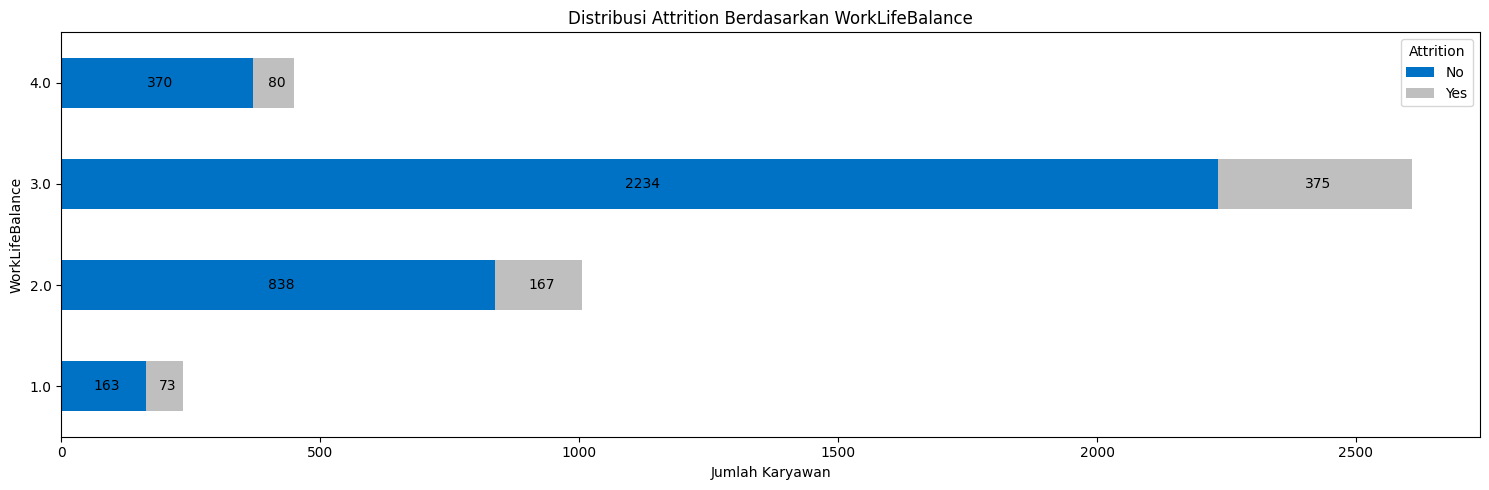

In [ ]:
# plot data
plot_attrition_distribution(df, 'EnvironmentSatisfaction')
plot_attrition_distribution(df, 'JobSatisfaction')
plot_attrition_distribution(df, 'WorkLifeBalance')

Dari ketiga grafik distribusi attrition berdasarkan EnvironmentSatisfaction, JobSatisfaction, dan WorkLifeBalance, terlihat pola bahwa tingkat kepuasan yang lebih tinggi cenderung berkorelasi dengan tingkat attrition yang lebih rendah. Pada EnvironmentSatisfaction, kategori dengan kepuasan tertinggi `4` memiliki jumlah attrition terendah `177`, sedangkan kategori dengan kepuasan terendah `1` memiliki jumlah attrition tertinggi `211`. Pola serupa terlihat pada JobSatisfaction, di mana kategori dengan kepuasan tertinggi `4` juga memiliki jumlah attrition terendah `152`, dan kategori dengan kepuasan terendah `1` memiliki jumlah attrition tertinggi `194`. Pada WorkLifeBalance, kategori dengan keseimbangan kerja-hidup terbaik `3` memiliki jumlah attrition terendah `73`, sementara kategori dengan keseimbangan kerja-hidup terburuk `1` memiliki jumlah attrition tertinggi `167`. Ini menunjukkan bahwa peningkatan kepuasan lingkungan kerja, kepuasan pekerjaan, dan keseimbangan kerja-hidup dapat berkontribusi terhadap pengurangan tingkat attrition karyawan.

## Attrition by Monthly Income & Percent Salary Hike

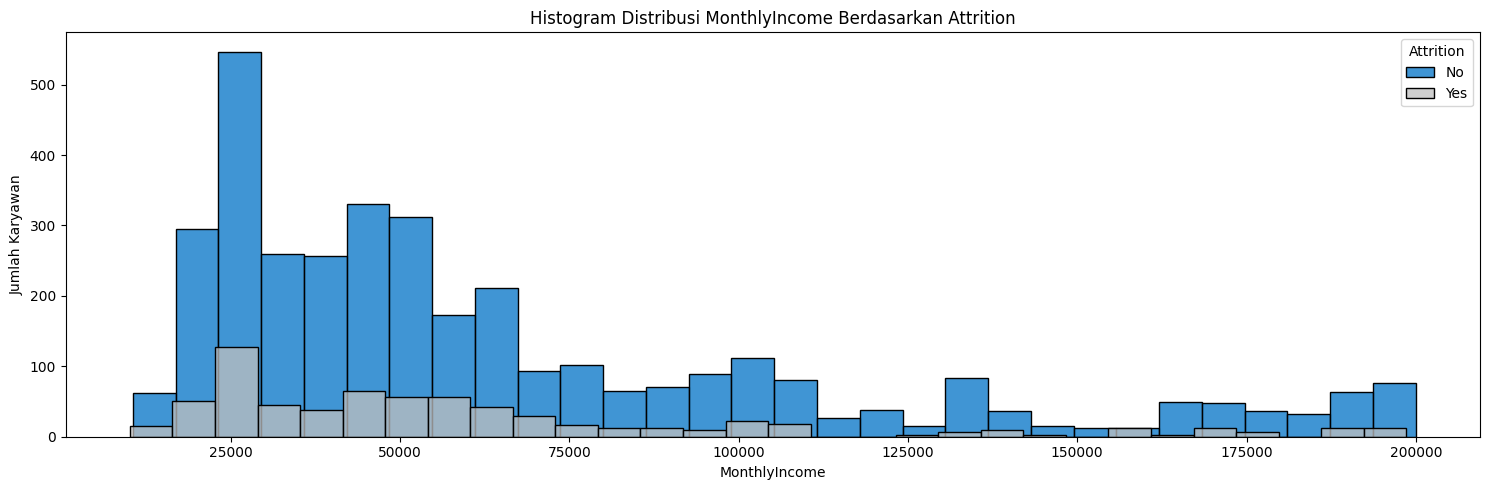

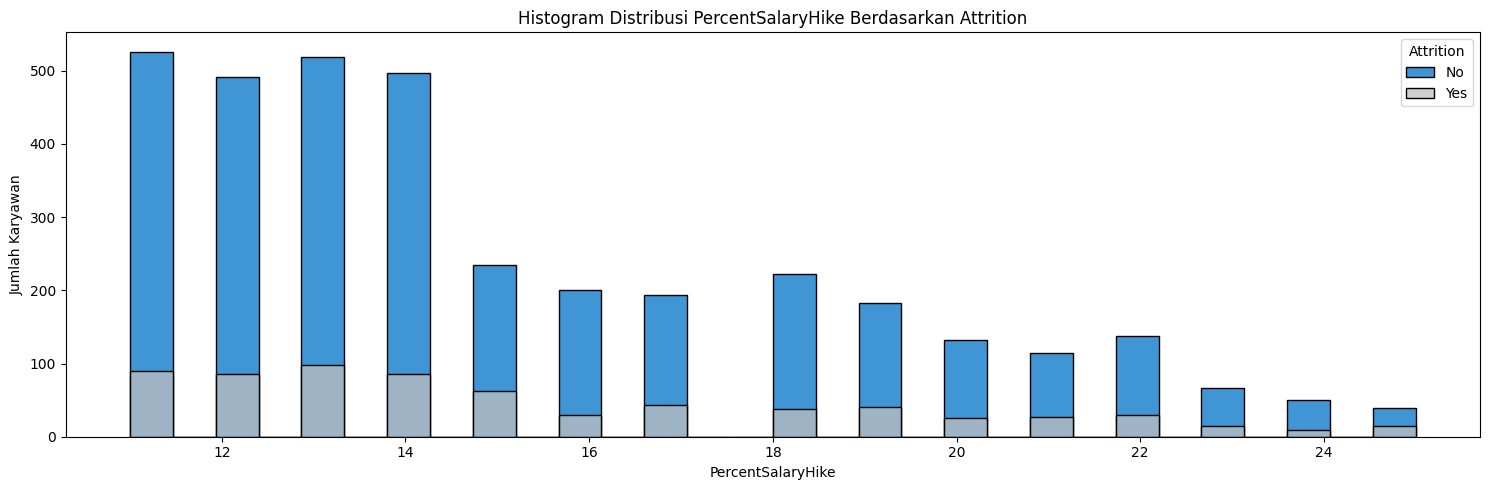

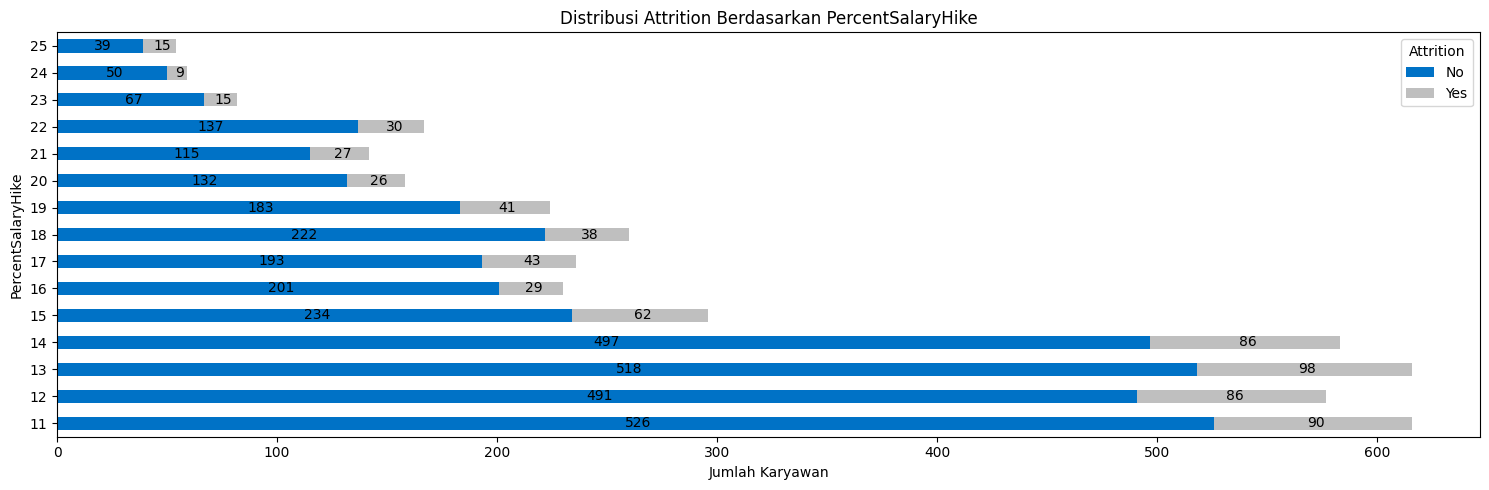

In [ ]:
# plot data
plot_attrition_histogram(df, 'MonthlyIncome')
plot_attrition_histogram(df, 'PercentSalaryHike')
plot_attrition_distribution(df, 'PercentSalaryHike')

Dari ketiga grafik distribusi attrition berdasarkan MonthlyIncome dan PercentSalaryHike, terlihat bahwa pendapatan bulanan dan persentase kenaikan gaji memiliki pengaruh terhadap tingkat attrition karyawan. Pada grafik distribusi MonthlyIncome, terlihat bahwa kelompok dengan pendapatan bulanan yang lebih rendah (sekitar 25.000 hingga 50.000) memiliki tingkat attrition yang lebih tinggi dibandingkan dengan kelompok pendapatan yang lebih tinggi. Seiring dengan meningkatnya pendapatan bulanan, jumlah karyawan yang mengalami attrition cenderung menurun, menunjukkan bahwa pendapatan yang lebih tinggi dapat mengurangi tingkat attrition.

Pada histogram distribusi PercentSalaryHike, terlihat bahwa kelompok dengan kenaikan gaji persentase yang lebih rendah (sekitar 11% hingga 14%) memiliki jumlah attrition yang lebih tinggi dibandingkan dengan kelompok yang menerima kenaikan gaji lebih besar. Grafik distribusi PercentSalaryHike menunjukkan bahwa kenaikan gaji yang lebih tinggi cenderung berkorelasi dengan tingkat attrition yang lebih rendah, dengan kelompok yang menerima kenaikan gaji sebesar 20% atau lebih menunjukkan tingkat attrition yang lebih rendah. 



## Korelasi antara taget dan kolom lain

In [ ]:
# Selecting numerical and categorical columns
cat_columns = ['BusinessTravel', 'Department','Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
               'MaritalStatus','StockOptionLevel','TrainingTimesLastYear','JobInvolvement', 'PerformanceRating',
               'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
num_columns = ['Age','DistanceFromHome','MonthlyIncome', 'NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears',
               'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

In [ ]:
# membagi kolom categorical dan numerical
df_num = df[num_columns]
df_cat = df[cat_columns]

### Korelasi target dengan kolom categorical

Karena target merupakan kolom kategorikal maka korelasi antar kolom kategorikal dan kolom target menggunakan chi2_contigency 

HO : tidak ada hubungan signifikan antara kolom katergorikal dan kolom target

H1 : terdapat hungungan signifikan antara kolom kategorikal dan kolom target

In [ ]:
# Menghitung chi-square p-value untuk setiap kolom categorical
chi2_p_values = {}

for col in cat_columns:
    contingency_table = pd.crosstab(df[col], df['Attrition'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_p_values[col] = p

# Mengubah hasil menjadi DataFrame
chi2_p_values_df = pd.DataFrame.from_dict(chi2_p_values, orient='index', columns=['p_value'])
chi2_p_values_df['Correlation'] = chi2_p_values_df['p_value'].apply(lambda p: 'Significant' if p < 0.05 else 'Not Significant')
chi2_p_values_df

,p_value,Correlation
BusinessTravel,5.097056e-15,Significant
Department,6.065983e-06,Significant
Education,2.340907e-01,Not Significant
EducationField,6.659853e-08,Significant
Gender,2.383827e-01,Not Significant
JobLevel,2.077200e-01,Not Significant
JobRole,3.896832e-03,Significant
MaritalStatus,5.900237e-29,Significant
StockOptionLevel,3.160815e-01,Not Significant
TrainingTimesLastYear,1.601774e-03,Significant


Hasil analisis korelasi menunjukkan bahwa beberapa faktor memiliki korelasi signifikan dengan attrition karyawan. Faktor-faktor yang signifikan meliputi BusinessTravel, Department, EducationField, JobRole, MaritalStatus, TrainingTimesLastYear, JobInvolvement, EnvironmentSatisfaction, JobSatisfaction, dan WorkLifeBalance. BusinessTravel, Department, EducationField, JobRole, dan MaritalStatus semuanya memiliki p-value yang sangat rendah, menunjukkan korelasi yang kuat dan signifikan dengan keputusan karyawan untuk keluar. TrainingTimesLastYear dan JobInvolvement juga signifikan, menunjukkan bahwa jumlah pelatihan dan tingkat keterlibatan dalam pekerjaan berpengaruh terhadap keputusan attrition. EnvironmentSatisfaction, JobSatisfaction, dan WorkLifeBalance memiliki korelasi signifikan, menandakan bahwa kepuasan lingkungan kerja, kepuasan pekerjaan, dan keseimbangan kerja-hidup adalah faktor-faktor penting yang mempengaruhi retensi karyawan. Di sisi lain, faktor-faktor seperti Education, Gender, JobLevel, StockOptionLevel, dan PerformanceRating tidak menunjukkan korelasi yang signifikan dengan attrition, sehingga mungkin memiliki pengaruh yang lebih kecil terhadap keputusan karyawan untuk keluar. Perusahaan dapat menggunakan wawasan ini untuk mengidentifikasi area yang perlu ditingkatkan guna mengurangi tingkat attrition dan meningkatkan retensi karyawan.

### Korelasi target dengan kolom numerical

In [ ]:
# Inisialisasi list untuk menyimpan hasil
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

# Loop melalui setiap kolom numerik dalam dataframe
for col in df_num.columns:
    # Hitung koefisien korelasi Spearman dan nilai p
    corr_coef, p_value = kendalltau(df_num[col], df['Attrition'])

    # Simpan hasil perhitungan ke dalam list yang sesuai
    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    # Tentukan apakah korelasi signifikan berdasarkan nilai p-value
    if p_value < 0.05:
        interpretation.append('Significant')
        selected_num_cols.append(col)  # Tambahkan kolom ke daftar kolom yang dipilih jika signifikan
    else:
        interpretation.append('Not Significant')

# Buat DataFrame untuk meringkas hasil
result_df = pd.DataFrame({
    'Column Name': cols,
    'Correlation Coefficient': corr,
    'P-value': p_values,
    'Correlation': interpretation
})

# Tampilkan DataFrame hasil
result_df

,Column Name,Correlation Coefficient,P-value,Correlation
0,Age,-0.138993,4.385903e-28,Significant
1,DistanceFromHome,-0.000478,9.703343e-01,Not Significant
2,MonthlyIncome,-0.021342,8.668777e-02,Not Significant
3,NumCompaniesWorked,0.026306,5.014859e-02,Not Significant
4,PercentSalaryHike,0.027845,3.274726e-02,Significant
5,TotalWorkingYears,-0.164761,5.093703e-38,Significant
6,YearsAtCompany,-0.161615,4.959808e-36,Significant
7,YearsSinceLastPromotion,-0.044551,1.119468e-03,Significant
8,YearsWithCurrManager,-0.151901,1.460928e-30,Significant


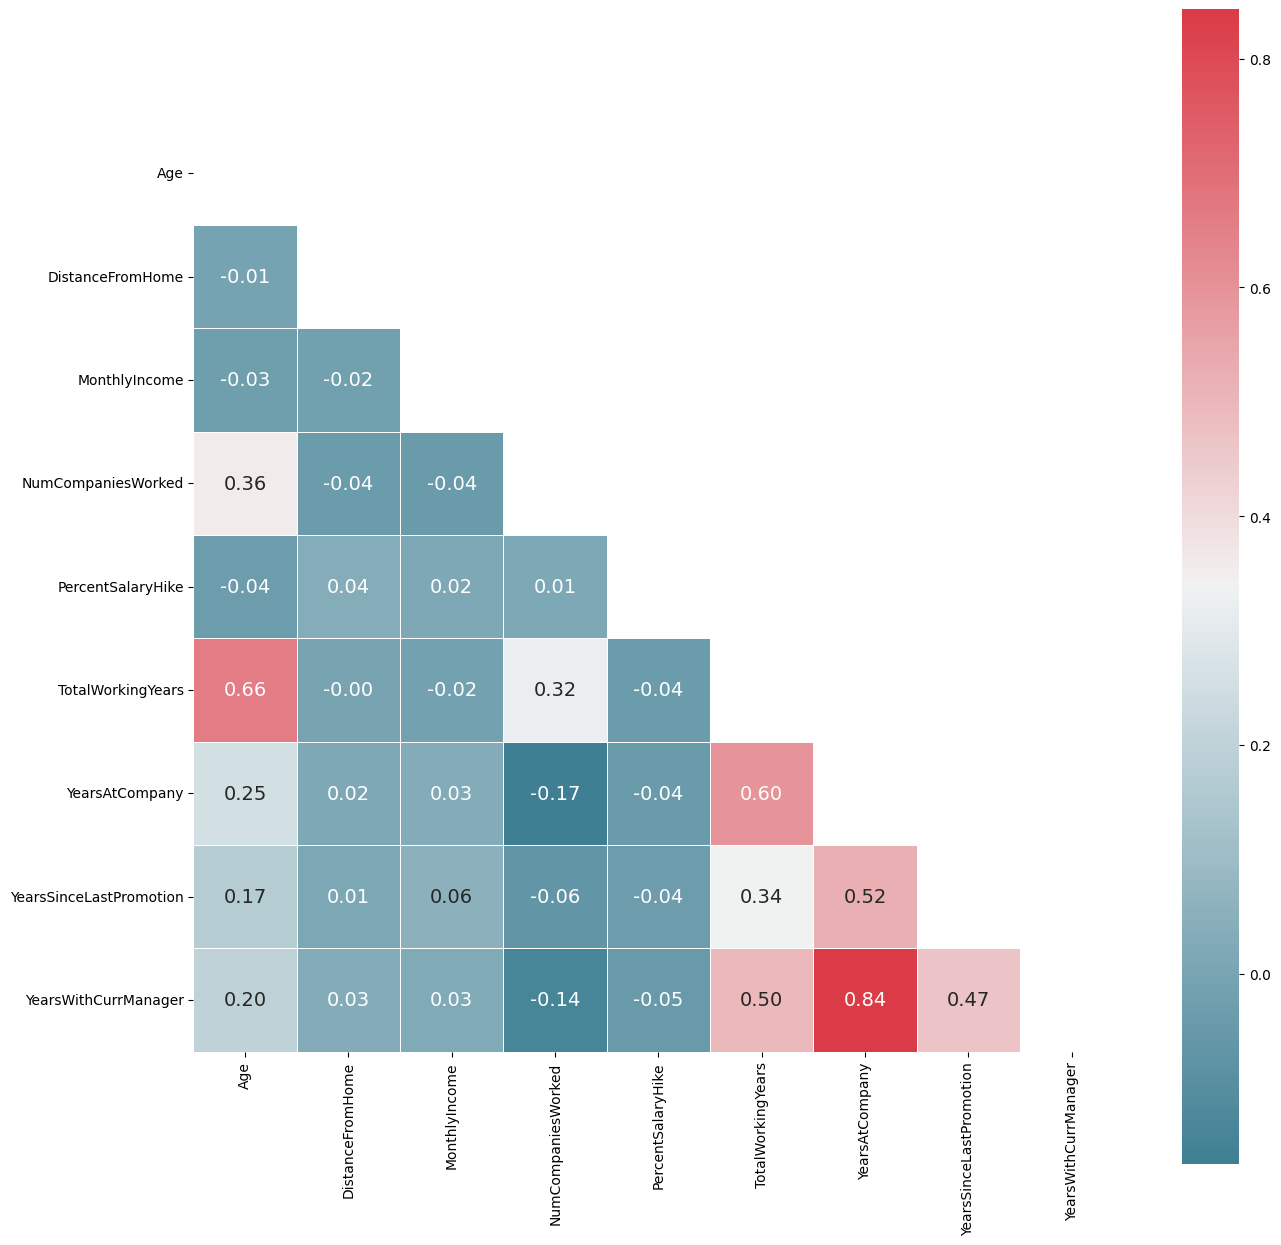

In [ ]:
# membuat visualisasi korelasi antar kolom
correlation = df_num.corr(method='spearman') 

fig, ax = plt.subplots()
ax.figure.set_size_inches(15, 15)

mask = np.triu(np.ones_like(correlation))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation, cmap=cmap, square=True, mask=mask, linewidths=.5, annot_kws={'size':14},
            annot=True, fmt='.2f')
plt.show()

Hasil analisis korelasi menunjukkan bahwa faktor-faktor seperti usia, persentase kenaikan gaji, total tahun bekerja, tahun di perusahaan saat ini, tahun sejak promosi terakhir, dan tahun dengan manajer saat ini memiliki korelasi yang signifikan dengan attrition karyawan. Usia, total tahun bekerja, tahun di perusahaan saat ini, tahun sejak promosi terakhir, dan tahun dengan manajer saat ini semuanya menunjukkan korelasi negatif yang signifikan, yang berarti karyawan yang lebih tua, dengan lebih banyak pengalaman kerja, dan yang telah bekerja lebih lama di perusahaan atau dengan manajer mereka saat ini, cenderung lebih kecil kemungkinannya untuk keluar. Sebaliknya, persentase kenaikan gaji menunjukkan korelasi positif yang signifikan, menunjukkan bahwa karyawan yang mendapatkan kenaikan gaji lebih tinggi cenderung lebih mungkin untuk keluar, mungkin karena mereka merasa lebih berharga dan menemukan peluang yang lebih baik di tempat lain. Faktor-faktor seperti jarak dari rumah, pendapatan bulanan, dan jumlah perusahaan yang pernah bekerja tidak menunjukkan korelasi signifikan dengan attrition, menunjukkan bahwa faktor-faktor ini tidak memiliki pengaruh yang berarti terhadap keputusan karyawan untuk keluar.

## Membuat data inference

Pada proses ini data di ambil 

In [ ]:
# membuat data inferece
data_inf = df.sample(5, random_state=10)
data_inf

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age Category
2305,2306,42,No,Travel_Frequently,Human Resources,1,4,Technical Degree,1,Male,2,Manufacturing Director,Married,31620,2.0,Y,17,8,2,24.0,1,20,13,9,3,3,4.0,4.0,1.0,34-46
3755,3756,28,No,Travel_Rarely,Research & Development,5,1,Technical Degree,1,Male,2,Laboratory Technician,Married,25590,1.0,Y,11,8,0,8.0,3,8,1,7,2,3,3.0,2.0,2.0,26-33
2277,2278,55,No,Travel_Rarely,Sales,20,3,Marketing,1,Male,2,Research Scientist,Married,47790,0.0,Y,14,8,1,4.0,6,3,1,2,3,3,4.0,3.0,3.0,47-60
1534,1535,32,No,Travel_Rarely,Research & Development,7,3,Technical Degree,1,Male,2,Healthcare Representative,Single,24720,7.0,Y,13,8,0,10.0,2,7,0,7,3,3,1.0,4.0,2.0,26-33
1120,1121,42,No,Travel_Rarely,Sales,1,3,Life Sciences,1,Female,1,Sales Executive,Divorced,23720,3.0,Y,12,8,1,14.0,3,0,0,0,3,3,2.0,4.0,3.0,34-46


In [ ]:
# Menghapus inference set dari dataset awal
df = df.drop(data_inf.index)

In [ ]:
# membuat data inference
data_inf.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

data_inf

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age Category
0,2306,42,No,Travel_Frequently,Human Resources,1,4,Technical Degree,1,Male,2,Manufacturing Director,Married,31620,2.0,Y,17,8,2,24.0,1,20,13,9,3,3,4.0,4.0,1.0,34-46
1,3756,28,No,Travel_Rarely,Research & Development,5,1,Technical Degree,1,Male,2,Laboratory Technician,Married,25590,1.0,Y,11,8,0,8.0,3,8,1,7,2,3,3.0,2.0,2.0,26-33
2,2278,55,No,Travel_Rarely,Sales,20,3,Marketing,1,Male,2,Research Scientist,Married,47790,0.0,Y,14,8,1,4.0,6,3,1,2,3,3,4.0,3.0,3.0,47-60
3,1535,32,No,Travel_Rarely,Research & Development,7,3,Technical Degree,1,Male,2,Healthcare Representative,Single,24720,7.0,Y,13,8,0,10.0,2,7,0,7,3,3,1.0,4.0,2.0,26-33
4,1121,42,No,Travel_Rarely,Sales,1,3,Life Sciences,1,Female,1,Sales Executive,Divorced,23720,3.0,Y,12,8,1,14.0,3,0,0,0,3,3,2.0,4.0,3.0,34-46


In [ ]:
# # simpan data inf
# data_inf.to_csv('Inf_Data.csv', index=False)

# V Feature Engineering

## Cardinality Handling

In [ ]:
# menampilkan unique value beserta valuenya
pd.set_option('display.max_colwidth', 1)
listItem = []
for i,col in enumerate(df.columns) :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
    

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Value
0,EmployeeID,4295,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, ...]"
1,Age,43,"[51, 31, 32, 38, 46, 28, 29, 25, 45, 55, 47, 37, 21, 35, 26, 50, 53, 44, 49, 36, 42, 18, 41, 39, 58, 33, 43, 52, 27, 30, 54, 40, 23, 48, 57, 34, 24, 22, 56, 60, 19, 20, 59]"
2,Attrition,2,"[No, Yes]"
3,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[6, 10, 17, 2, 8, 11, 18, 1, 7, 14, 3, 16, 9, 5, 4, 20, 29, 15, 13, 24, 19, 28, 22, 25, 21, 26, 27, 12, 23]"
6,Education,5,"[2, 1, 4, 5, 3]"
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources]"
8,EmployeeCount,1,[1]
9,Gender,2,"[Female, Male]"


- Data menunjukan adanya kolom yang menunjukan value yang sama setiap barisnya yaitu kolom `StandardHours`, `Over18` , dan `EmployeeCount`. Kolom tersebut akan didrop karena value yang di sajikan sama setiap baris.
- Kolom `Attrition` yang menjadi target dalam pemodelan ini akan di rubah valuenya menjadi 0 untuk value No dan 1 untuk value Yes.
- Kolom `EmployeeID` merupakan kolom penanda id setiap karyawan maka kolom tersebut tidak akan digunakan sebagai fitur.

In [ ]:
# Mengubah value pada target
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

## Feature Selection

Berdasarkan hasil EDA maka kolom yang digunakan untuk menjadi fitur adalah kolom yang memiliki korelasi yang signifikan terhadap target.

In [ ]:
# Pemilihan fitur
df_feature = df[['Attrition','BusinessTravel', 'Department', 'EducationField', 'JobRole',
               'MaritalStatus','TrainingTimesLastYear','JobInvolvement',
               'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance','Age',
               'PercentSalaryHike','TotalWorkingYears','YearsAtCompany',
               'YearsSinceLastPromotion','YearsWithCurrManager',]]
df_feature.head()

,Attrition,BusinessTravel,Department,EducationField,JobRole,MaritalStatus,TrainingTimesLastYear,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,0,Travel_Rarely,Sales,Life Sciences,Healthcare Representative,Married,6,3,3.0,4.0,2.0,51,11,1.0,1,0,0
1,1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Single,3,2,3.0,2.0,4.0,31,23,6.0,5,1,4
2,0,Travel_Frequently,Research & Development,Other,Sales Executive,Married,2,3,2.0,2.0,1.0,32,15,5.0,5,0,3
3,0,Non-Travel,Research & Development,Life Sciences,Human Resources,Married,5,2,4.0,4.0,3.0,38,11,13.0,8,7,5
4,0,Travel_Rarely,Research & Development,Medical,Sales Executive,Single,2,3,4.0,1.0,3.0,32,12,9.0,6,0,4


## Data Split Train Test

In [ ]:
# Define features and target variable
X = df_feature.drop('Attrition', axis=1)
y = df_feature['Attrition'] #yang di prediksi

# Split df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (3436, 16)
Test Size:  (859, 16)


## Handling Missing Value

In [ ]:
# cek missing value
X_train.isnull().sum()

BusinessTravel             0
Department                 0
EducationField             0
JobRole                    0
MaritalStatus              0
TrainingTimesLastYear      0
JobInvolvement             0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
PercentSalaryHike          0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
# cek missing value
X_test.isnull().sum()

BusinessTravel             0
Department                 0
EducationField             0
JobRole                    0
MaritalStatus              0
TrainingTimesLastYear      0
JobInvolvement             0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
PercentSalaryHike          0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [ ]:
# cek missing value
y_train.isnull().sum()

0

In [ ]:
# cek missing value
y_test.isnull().sum()

0

Missing value pada data sudah dijelaskan dan ditangani pada tahapan sebelumnya 

## Outlier Handling

Berdasarkan karakteristik data outlier yang ada merupakan natural outlier untuk itu sebelum penanganan akan di lihat seberapa banyak proporsi outlier yang ada, kemudian baru di tentukan apakah outlier yang ada akan ditangani atau tidak.

In [ ]:
# Selecting numerical and categorical columns
cat_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole',
               'MaritalStatus','TrainingTimesLastYear','JobInvolvement',
               'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
num_columns = ['Age','PercentSalaryHike','TotalWorkingYears',
               'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager',]

print('Categorical Columns: ', cat_columns)
print('Numerical Columns: ', num_columns)

Categorical Columns:  ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'TrainingTimesLastYear', 'JobInvolvement', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
Numerical Columns:  ['Age', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
# Making data and columns for normal distribution
data_normal = []
column_normal = []

# Making data and columns for skewed distribution
data_skewed = []
column_skewed = []

# For loop in every numerical column to filter the data distribution into either normally distributed or skewed columns
for num in num_columns:
    skewness = X_train[num].skew()

    # If the data is normally distributed
    if skewness <= 0.5 and skewness >= -0.5:
        column_normal.append(num)
        data_normal.append([num, skewness])

    # If the data has low negative skewness
    elif skewness < -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # If the data has low positive skewness
    elif skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

    # If the data has moderate negative skewness
    elif skewness <= -0.5 and skewness > -1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # If the data has moderate positive skewness
    elif skewness >= 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

In [ ]:
# Showing normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness
0,Age,0.418139


In [ ]:
# Showing skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,PercentSalaryHike,0.802581,low
1,TotalWorkingYears,1.120107,high
2,YearsAtCompany,1.757481,high
3,YearsSinceLastPromotion,1.983905,high
4,YearsWithCurrManager,0.822484,low


In [ ]:
num_train = X_train[num_columns]
for k, v in num_train.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(num_train)[0]
  print("Column %s outliers = %.2f%%" % (k, perc))

Column Age outliers = 0.00%
Column PercentSalaryHike outliers = 0.00%
Column TotalWorkingYears outliers = 4.22%
Column YearsAtCompany outliers = 7.80%
Column YearsSinceLastPromotion outliers = 7.36%
Column YearsWithCurrManager outliers = 0.90%


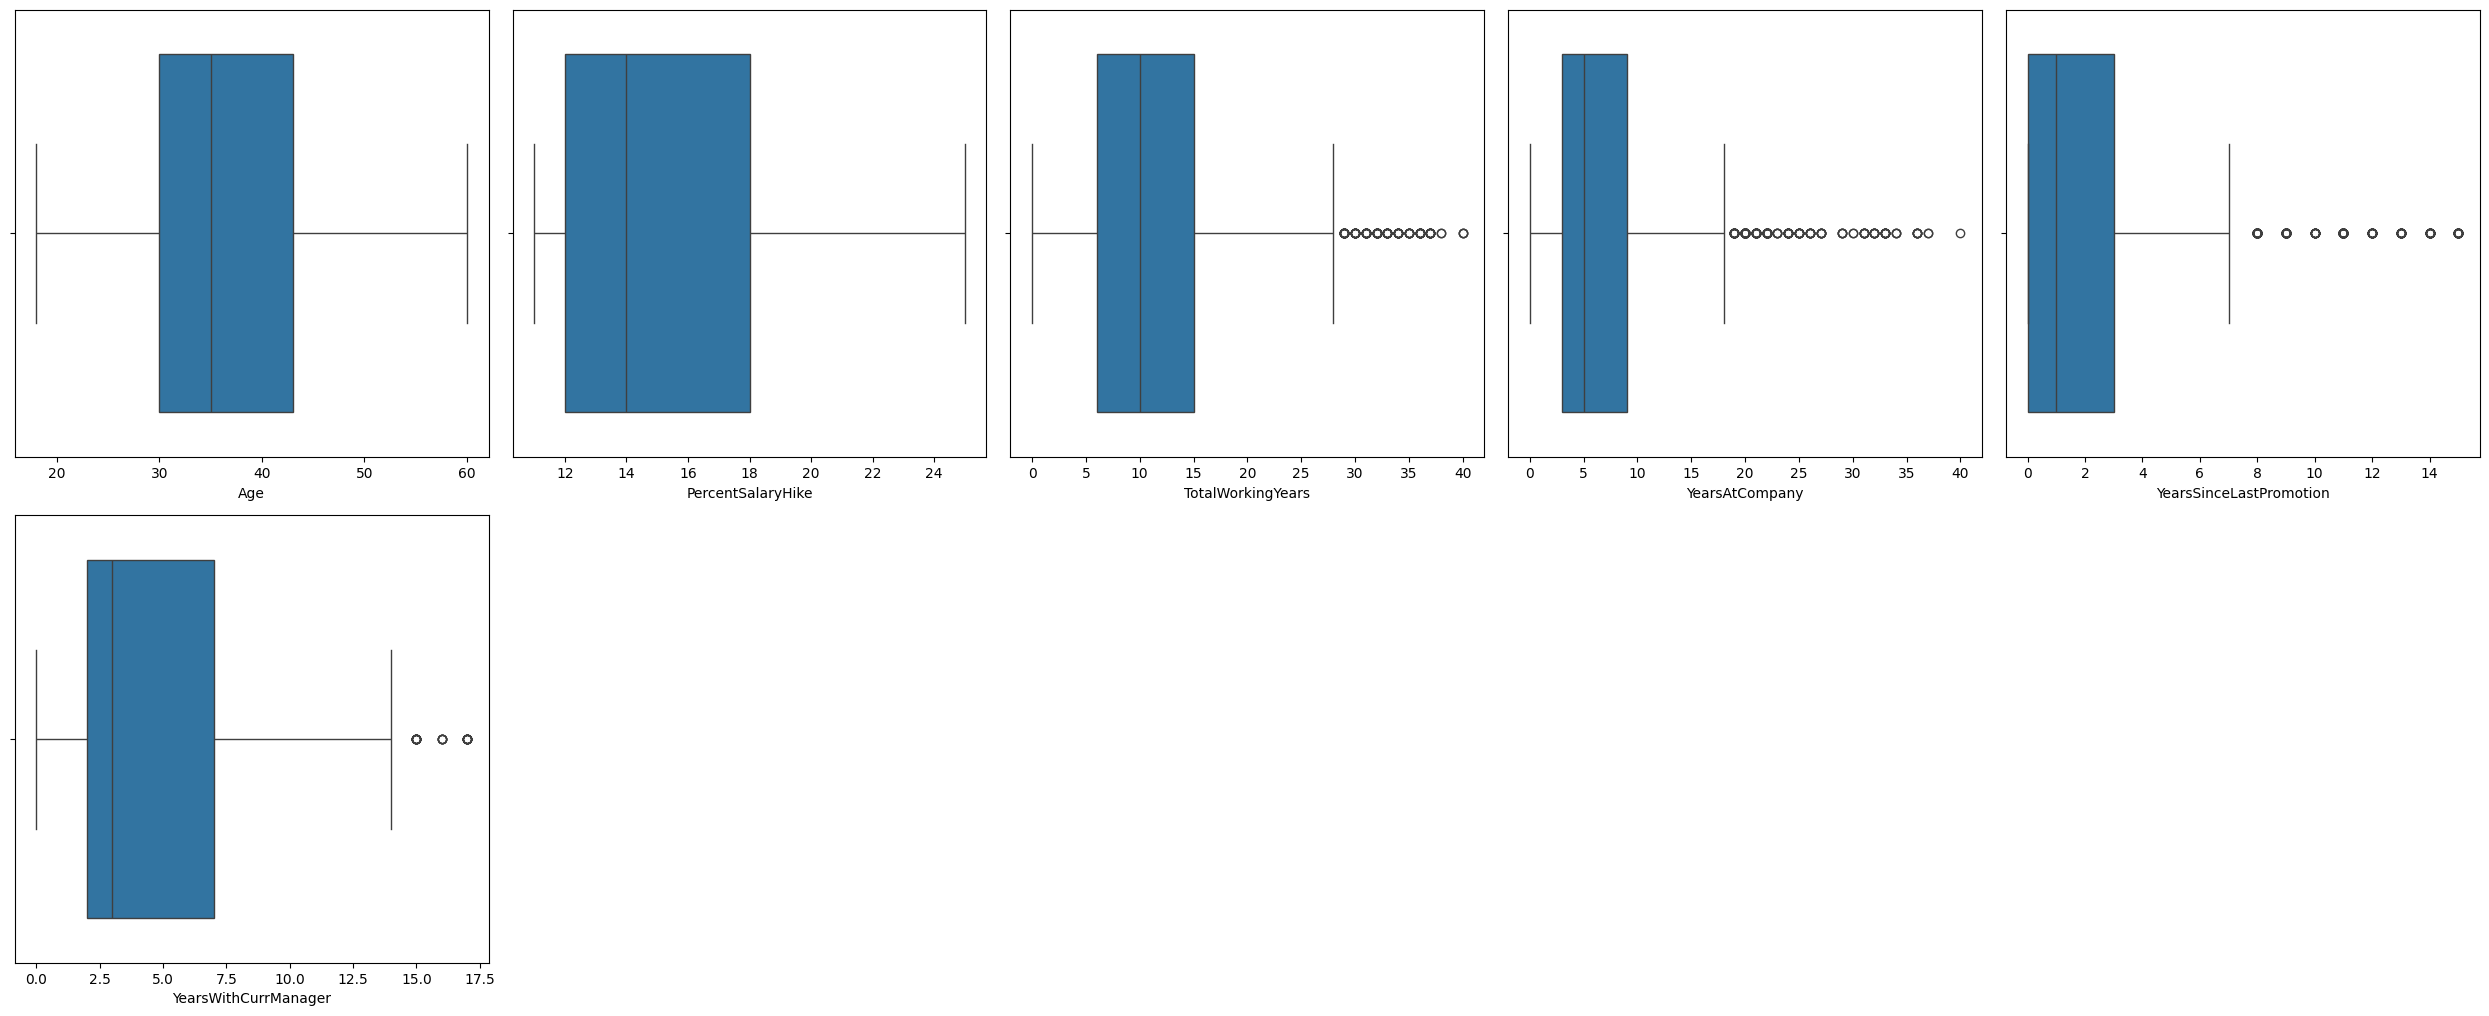

In [ ]:
# menampilkan boxplot kolom numeric
plt.figure(figsize=(25, 25))
for index, column in enumerate(num_columns):
    plt.subplot(5, 5, index + 1)
    sns.boxplot(x=X_train[column])

plt.tight_layout()
plt.show()

Pada fitur numerik terdapat beberapa fitur yang memiliki outlier dimana ini merupakan tipe natural outlier . Outlier pada fitur tergolong rendah dimana presentase outlier kurang dari 8% maka dengan memperhitungkan presentase, jenis outlier dan cara pengambilan data outlier pada fitur tidak akan dilakukan handling.

## Scaling and Encoding

Pada tahapan ini akan menggunakan pipeline untuk mentransformasi data agar siap digunakan dalam pemodelan pada tahap selanjutnya.

In [ ]:
# define variable for pipeline
cat_columns = ['TrainingTimesLastYear','JobInvolvement',
               'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
ohe_columns = ['Department', 'EducationField', 'JobRole']
ode_columns = ['BusinessTravel','MaritalStatus']
num_columns = ['Age','PercentSalaryHike','TotalWorkingYears',
               'YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager',]

### Column Transformer

In [ ]:
ordinal_categories = [['Non-Travel','Travel_Rarely','Travel_Frequently'], 
                      ['Single','Married','Divorced']]
# Numeric pipeline
num_pipe = Pipeline([
    ('scaling', RobustScaler())
])

# Nominal categorical pipeline
nominal_pipe = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Ordinal categorical pipeline
ordinal_pipe = Pipeline([
    ('ordinal', OrdinalEncoder(categories=ordinal_categories))
])

# Preprocessing pipeline
preprocess = ColumnTransformer([
    ('num', num_pipe, num_columns),
    ('nominal', nominal_pipe, ohe_columns),
    ('ordinal', ordinal_pipe, ode_columns),
    ('cat', 'passthrough', cat_columns)
])


## Data Balancing

Data pada target termasuk moderate imbalance dimana proporsi minority class hanya sebesar 16%. Untuk mengatasi model machine learning agar tidak bias terhadap majority class dilakukan balancing menggunakan SMOTENC pada target.

In [ ]:
# Mencari indices categorical column
categorical_column_indices = [X_train.columns.get_loc(col) for col in cat_columns]
smote_nc = SMOTENC(categorical_column_indices, random_state=20)

# VI Model Definition

Model yang dipilih untuk dibandingkan ada 5 model yaitu:
1. **K-Nearest Neighbors (KNN)**: KNN adalah model instance-based learning yang mengklasifikasikan data baru berdasarkan kedekatan dengan instance yang sudah ada dalam dataset pelatihan. Sebagai algoritma non-parametrik, KNN menyimpan semua contoh data dan menentukan kelas dari data baru melalui mayoritas suara dari k tetangga terdekatnya. Kelebihannya adalah kesederhanaan dan kemampuannya menangani data multikelas, namun kelemahannya termasuk kebutuhan memori tinggi dan kecepatan prediksi yang lambat untuk dataset besar.

2. **Support Vector Classifier (SVC)**: SVC adalah model klasifikasi yang berfungsi dengan menemukan hyperplane terbaik yang memisahkan kelas yang berbeda dengan margin maksimum. Model ini dapat diperluas untuk klasifikasi non-linear melalui penggunaan kernel trick, yang memungkinkan data dipetakan ke dimensi yang lebih tinggi. SVC efektif untuk dataset dengan dimensi tinggi dan kasus yang memiliki margin kelas yang jelas, namun bisa kurang efisien untuk dataset yang sangat besar karena kompleksitas komputasi yang tinggi.

3. **Decision Tree**: Decision Tree adalah model non-parametrik yang memecah data menjadi subset yang lebih kecil dengan membentuk struktur pohon keputusan, di mana setiap node mewakili tes pada atribut, cabang mewakili hasil tes, dan daun mewakili label kelas. Model ini mudah dipahami dan diinterpretasikan serta mampu menangani data numerik dan kategorikal. Namun, Decision Tree rentan terhadap overfitting, terutama pada dataset yang kecil atau kompleks.

4. **Random Forest**: Random Forest adalah model ensemble yang terdiri dari banyak pohon keputusan yang dilatih pada subset acak dari data pelatihan dan menggunakan mayoritas suara untuk klasifikasi atau rata-rata untuk regresi sebagai prediksi akhir. Ini meningkatkan akurasi dan mengurangi risiko overfitting dibandingkan dengan pohon keputusan tunggal. Random Forest sangat baik dalam menangani dataset dengan fitur yang kompleks dan bervariasi, tetapi bisa menjadi kurang interpretatif karena kompleksitas modelnya.

5. **XGBoost (Extreme Gradient Boosting)**: XGBoost adalah algoritma gradient boosting yang dioptimalkan untuk kecepatan dan kinerja, membangun model dengan menambahkan pohon keputusan secara berturut-turut, di mana setiap pohon baru memperbaiki kesalahan dari pohon sebelumnya. XGBoost terkenal dengan efisiensi memori dan kinerja tinggi dalam menangani dataset besar dan kompleks, serta kemampuannya mengatasi data yang tidak seimbang. Namun, tuning hiperparameter XGBoost bisa rumit dan memerlukan pengetahuan yang lebih mendalam tentang model.

In [ ]:
#Making pipeline for KNN
pipe_KNN = Pipeline([
('transformer', preprocess),
('smote', smote_nc),
('classifier', KNeighborsClassifier())
])

In [ ]:
#Making pipeline for SVC
pipe_SVC = Pipeline([
('transformer', preprocess),
('smote', smote_nc),
('classifier', SVC())
])

In [ ]:
# pipeline for random forrest
pipe_RFC = Pipeline([
('transformer', preprocess),
('smote', smote_nc),
('classifier', RandomForestClassifier(random_state = 1))
])

In [ ]:
# pipeline for decision tree
pipe_DT = Pipeline([
('transformer', preprocess),
('smote', smote_nc),
('classifier', DecisionTreeClassifier(random_state = 1))
])

In [ ]:
#Making pipeline for XGBoost
pipe_XGB = Pipeline([
('transformer', preprocess),
('smote', smote_nc),
('classifier', XGBClassifier(random_state = 1))
])

# VII Model Training

Metrik evaluasi yang digunakan adalah recall dimana sesuai objective dari project ini untuk memfokuskan model memprediksi employee yang akan keluar dari perusahaan, maka model dengan nilai recall terbaik akan dipilih menjadi model utama.

## Model Bencmarking

In [ ]:
# Daftar semua model
models = {'pipe_KNN': pipe_KNN, 'pipe_SVC': pipe_SVC, 'pipe_DT': pipe_DT, 'pipe_RFC': pipe_RFC, 'pipe_XGB': pipe_XGB}

# Buat DataFrame untuk menyimpan hasil perbandingan
report_base = pd.DataFrame()

# Lakukan loop untuk setiap model
for model_name, model in models.items():
    # Latih model
    model.fit(X_train, y_train)
    
    # Lakukan prediksi
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Hitung recall score untuk setiap model
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    # Simpan hasil ke DataFrame
    report_base[model_name] = {'Train - Recall': train_recall, 'Test - Recall': test_recall}

# Tampilkan hasil perbandingan
report_base


,pipe_KNN,pipe_SVC,pipe_DT,pipe_RFC,pipe_XGB
Train - Recall,1.000000,0.805755,1.0,1.000000,1.0
Test - Recall,0.978417,0.697842,1.0,0.978417,1.0


## Cross Validation

Pada tahapan ini dilakukan crossvalidation pada setiap basemodel untuk memastikan kinerja model ketika berhadapan dengan berbagai variasi data.

In [ ]:
# cross validation benchmarking
cv_knn = cross_val_score(pipe_KNN, X_train, y_train, cv = StratifiedKFold(n_splits=5), scoring = 'recall')
cv_svc = cross_val_score(pipe_SVC, X_train, y_train, cv = StratifiedKFold(n_splits=5), scoring = 'recall')
cv_dt = cross_val_score(pipe_DT, X_train, y_train, cv = StratifiedKFold(n_splits=5), scoring = 'recall')
cv_rf = cross_val_score(pipe_RFC, X_train, y_train, cv = StratifiedKFold(n_splits=5), scoring = 'recall')
cv_xgb = cross_val_score(pipe_XGB, X_train, y_train, cv = StratifiedKFold(n_splits=5), scoring = 'recall')

# Best model
print('Cross Validation (All Baseline Models)\n')
print('KNN')
print(f'Recall score (all): {cv_knn}\nRecall score (mean): {cv_knn.mean():.2f}\nRecall score (sd): {cv_knn.std():.2f}\nRange recall score: {(cv_knn.mean() - cv_knn.std()):.2f} - {(cv_knn.mean() + cv_knn.std()):.2f}\n')
print('SVC')
print(f'Recall score (all): {cv_svc}\nRecall score (mean): {cv_svc.mean():.2f}\nRecall score (sd): {cv_svc.std():.2f}\nRange recall score: {(cv_svc.mean() - cv_svc.std()):.2f} - {(cv_svc.mean() + cv_svc.std()):.2f}\n')
print('Decision Tree')
print(f'Recall score (all): {cv_dt}\nRecall score (mean): {cv_dt.mean():.2f}\nRecall score (sd): {cv_dt.std():.2f}\nRange recall score: {(cv_dt.mean() - cv_dt.std()):.2f} - {(cv_dt.mean() + cv_dt.std()):.2f}\n')
print('Random Forest')
print(f'Recall score (all): {cv_rf}\nRecall score (mean): {cv_rf.mean():.2f}\nRecall score (sd): {cv_rf.std():.2f}\nRange recall score: {(cv_rf.mean() - cv_rf.std()):.2f} - {(cv_rf.mean() + cv_rf.std()):.2f}\n')
print('xgb Boosting')
print(f'Recall score (all): {cv_xgb}\nRecall score (mean): {cv_xgb.mean():.2f}\nRecall score (sd): {cv_xgb.std():.2f}\nRange recall score: {(cv_xgb.mean() - cv_xgb.std()):.2f} - {(cv_xgb.mean() + cv_xgb.std()):.2f}\n')

Cross Validation (All Baseline Models)

KNN
Recall score (all): [0.89285714 0.91891892 0.86486486 0.96396396 0.9009009 ]
Recall score (mean): 0.91
Recall score (sd): 0.03
Range recall score: 0.88 - 0.94

SVC
Recall score (all): [0.74107143 0.72072072 0.66666667 0.67567568 0.72972973]
Recall score (mean): 0.71
Recall score (sd): 0.03
Range recall score: 0.68 - 0.74

Decision Tree
Recall score (all): [0.91964286 0.89189189 0.84684685 0.96396396 0.9009009 ]
Recall score (mean): 0.90
Recall score (sd): 0.04
Range recall score: 0.87 - 0.94

Random Forest
Recall score (all): [0.86607143 0.88288288 0.84684685 0.93693694 0.89189189]
Recall score (mean): 0.88
Recall score (sd): 0.03
Range recall score: 0.85 - 0.92

xgb Boosting
Recall score (all): [0.88392857 0.88288288 0.86486486 0.94594595 0.9009009 ]
Recall score (mean): 0.90
Recall score (sd): 0.03
Range recall score: 0.87 - 0.92



Berdarsarkan hasil model benchmarking pada 5 model di atas terlihat bahwa seluruh tree base model dan KNN performanya lebih baik ketimbang SVC, hal ini dikarenakan model SVC tidak dapat menangani outlier sebaik tree base model atau KNN. Model KNN dan Decision Tree nilai rata-rata crossvalidasi hasilnya tidak terlalu jauh dengan nilai rata-rata recall 91% untuk KNN dan 90%, jika dibandingkan dengan hasil score train dan test dengan menggunakan base parameter model KNN terlihat overfiting dan model Decision Tree tidak overfit.


Mempertimbangkan computational cost serta jika model akan diterapkan pada data yang lebih besar maka di pilih model Decision Tree. Tetapi perlu diperhatikan bahwa model ini perlu di tuning dengan baik agar tidak terjadi overfit, maka akan dilakukan tuning pada tahapan selanjutnya untuk menemukan best parameter. 

## Hyperparameter Tuning

In [ ]:
#fit model
pipe_DT.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   RobustScaler())]),
                                                  ['Age', 'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Department',
                                                   'EducationField',
                                                   'JobRole']...
                                                                                               'Travel_Rarely',
                                                                                               'Travel_Frequently'],
                                                                                              ['Single',
                                                                                               'Married',
                                                                                               'Divorced']]))]),
                                                  ['BusinessTravel',
                                                   'MaritalStatus']),
                                                 ('cat', 'passthrough',
                                                  ['TrainingTimesLastYear',
                                                   'JobInvolvement',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance'])])),
                ('smote',
                 SMOTENC(categorical_features=[5, 6, 7, 8, 9],
                         random_state=20)),
                ('classifier', DecisionTreeClassifier(random_state=1))])

In [ ]:
# Predict
y_train_pred_DT = pipe_DT.predict(X_train)
y_test_pred_DT = pipe_DT.predict(X_test)

# Comparison report
report = pd.DataFrame({})
report['Decision Tree (Baseline)'] = {
    'Train - Recall':recall_score(y_train, y_train_pred_DT),
    'Test - Recall':recall_score(y_test, y_test_pred_DT),
    }
report

,Decision Tree (Baseline)
Train - Recall,1.0
Test - Recall,1.0


In [ ]:
# define parameter untuk di tuning
param_DT = {
    'classifier__criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'classifier__splitter': ['best', 'random'],  # Strategy used to choose the split at each node
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'classifier__max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}
grid = GridSearchCV(pipe_DT, param_grid = param_DT, cv = 5, scoring = 'recall')
grid.fit(X_train, y_train)
dt_grid_best = grid.best_estimator_
grid.best_params_

{'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'log2',
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__splitter': 'random'}

In [ ]:
#menampilkan model dengan best parameter
dt_grid_best

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaling',
                                                                   RobustScaler())]),
                                                  ['Age', 'PercentSalaryHike',
                                                   'TotalWorkingYears',
                                                   'YearsAtCompany',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('nominal',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Department',
                                                   'EducationField',
                                                   'JobRole']...
                                                                                               'Married',
                                                                                               'Divorced']]))]),
                                                  ['BusinessTravel',
                                                   'MaritalStatus']),
                                                 ('cat', 'passthrough',
                                                  ['TrainingTimesLastYear',
                                                   'JobInvolvement',
                                                   'EnvironmentSatisfaction',
                                                   'JobSatisfaction',
                                                   'WorkLifeBalance'])])),
                ('smote',
                 SMOTENC(categorical_features=[5, 6, 7, 8, 9],
                         random_state=20)),
                ('classifier',
                 DecisionTreeClassifier(max_features='log2', random_state=1,
                                        splitter='random'))])

Setelah di tuning didapat best parameter yang akan digunakan pada model Decision Tree:

    'classifier__criterion': 'gini',
    'classifier__max_depth': None,
    'classifier__max_features': 'log2',
    'classifier__min_samples_leaf': 1,
    'classifier__min_samples_split': 2,
    'classifier__splitter': 'random'

# VIII Model Evaluation

## Model After Tuning Comparison

In [ ]:
# Predict grid search
y_train_pred_grid = dt_grid_best.predict(X_train)
y_test_pred_grid = dt_grid_best.predict(X_test)
report['Decision Tree (Grid Search)'] = {
    'Train - Recall':recall_score(y_train, y_train_pred_DT),
    'Test - Recall':recall_score(y_test, y_test_pred_DT),
    }
report

,Decision Tree (Baseline),Decision Tree (Grid Search)
Train - Recall,1.0,1.0
Test - Recall,1.0,1.0


In [ ]:
# Evaluate dengan classification report
target = ['Attrition No', 'Attrition Yes']
print('Test score: {:.4f}'.format(dt_grid_best.score(X_test, y_test)))
print(classification_report(y_test,y_test_pred_grid,target_names = target))

Test score: 0.9895
               precision    recall  f1-score   support

 Attrition No       1.00      0.99      0.99       720
Attrition Yes       0.96      0.98      0.97       139

     accuracy                           0.99       859
    macro avg       0.98      0.99      0.98       859
 weighted avg       0.99      0.99      0.99       859



Text(0.5, 1.0, 'Confusion Matrix Test-set')

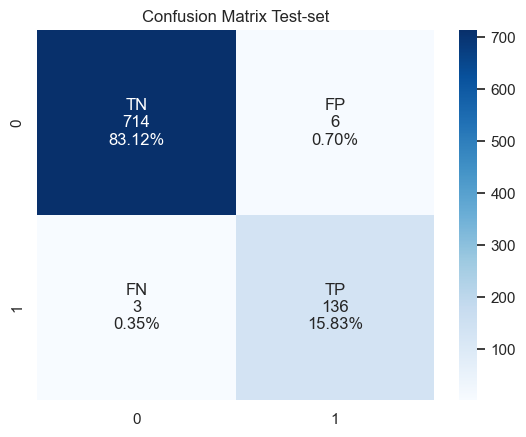

In [ ]:
# Evaluasi menggunakan confusion matrix
confusion = confusion_matrix(y_test, y_test_pred_grid)
names = ['TN','FP','FN','TP']
counts = [value for value in confusion.flatten()]
percentages = ['{0:.2%}'.format(value) for value in confusion.flatten()/np.sum(confusion)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.set(style="darkgrid")
sns.heatmap(confusion,annot = labels,cmap = 'Blues',fmt ='')
plt.title('Confusion Matrix Test-set')

## Model Analysis

Model Decision Tree, baik dalam versi dasarnya maupun setelah dioptimalkan dengan grid search, menunjukkan kinerja yang sangat baik dalam memprediksi attrition karyawan, yang tercermin dari berbagai metrik evaluasi.

- Recall untuk data pelatihan dan pengujian sempurna (1.0) untuk kedua versi model. Recall mengukur proporsi kasus positif sebenarnya (karyawan yang keluar) yang berhasil diidentifikasi oleh model. Dalam hal ini, model berhasil mengidentifikasi semua kasus attrition, yang sangat penting dalam konteks bisnis untuk meminimalkan turnover karyawan.
- Precision untuk kelas 'Attrition Yes' adalah 0.96, menunjukkan bahwa 96% dari karyawan yang diidentifikasi oleh model sebagai kemungkinan keluar memang benar. Precision yang tinggi penting untuk menghindari intervensi yang tidak perlu terhadap karyawan yang tidak berencana untuk keluar.
- F1-score untuk kelas 'Attrition Yes' adalah 0.97, yang menyeimbangkan precision dan recall, memberikan metrik tunggal untuk kinerja keseluruhan.
- Akurasi keseluruhan model adalah 0.99, menunjukkan bahwa 99% dari prediksi yang dibuat oleh model benar. Akurasi yang tinggi ini menunjukkan efektivitas model dalam mengklasifikasikan kasus attrition dan non-attrition.
- Confusion matrix menunjukkan 714 true negatives (TN), 6 false positives (FP), 3 false negatives (FN), dan 136 true positives (TP). Ini mengungkapkan bahwa model membuat sangat sedikit kesalahan dalam prediksi, baik dalam hal false positives maupun false negatives.
- Kemampuan model untuk secara akurat memprediksi karyawan yang kemungkinan akan keluar (recall) sangat penting untuk strategi retensi proaktif. Mengidentifikasi semua karyawan potensial yang akan keluar memungkinkan perusahaan mengambil tindakan preventif untuk mempertahankan karyawan yang berharga.
- Dengan hanya 3 false negatives, model memastikan bahwa hampir semua karyawan yang berisiko keluar diidentifikasi, meminimalkan turnover yang tidak terduga.
- Kelemahan model jika di ujikan pada data yang lebih besar decision tree akan cenderung mengalami overfiting.

# IX Model Saving

In [ ]:
# # meninyimpan model
pickle.dump(dt_grid_best, open('model.pkl', 'wb'))

# X Kesimpulan

- Berdasarkan hasil evaluasi performa model, dapat disimpulkan bahwa model yang dikembangkan memiliki kinerja yang sangat baik dalam memprediksi kasus attrition karyawan. Dengan nilai recall sempurna (1.0) untuk kedua versi model, artinya model mampu mengidentifikasi semua kasus karyawan yang keluar dengan akurat. Precision yang tinggi (0.96) untuk kelas 'Attrition Yes' menunjukkan bahwa sebagian besar prediksi positif model benar, menghindari intervensi yang tidak perlu terhadap karyawan yang tidak berencana keluar. F1-score yang tinggi (0.97) menyeimbangkan precision dan recall, memberikan gambaran keseluruhan tentang kinerja model. Akurasi keseluruhan model yang mencapai 0.99 menunjukkan tingkat keakuratan yang tinggi dalam mengklasifikasikan kasus attrition dan non-attrition. Confusion matrix mengungkapkan bahwa model hampir tidak membuat kesalahan, dengan hanya sedikit false positives dan false negatives. Dengan demikian, dapat diandalkan bahwa model ini akan menjadi alat yang efektif bagi perusahaan untuk mengidentifikasi karyawan yang berpotensi keluar, sehingga memungkinkan pengambilan tindakan yang tepat untuk meminimalkan turnover karyawan.

- Salah satu kelebihan yang signifikan dari model yang dikembangkan adalah kemampuannya untuk mengurangi biaya rekrutmen dengan mengidentifikasi hampir semua karyawan yang berisiko keluar (false negatives yang rendah). Dalam konteks ini, pengurangan false negatives berarti perusahaan dapat menghindari biaya yang terkait dengan proses rekrutmen yang panjang dan mahal untuk mengisi posisi yang ditinggalkan secara mendadak. Dengan mengidentifikasi karyawan yang berpotensi keluar dengan akurat, perusahaan dapat mengambil tindakan preventif yang tepat, seperti meningkatkan retensi dan kesejahteraan karyawan, sehingga mengurangi kebutuhan akan perekrutan baru dan biaya yang terkait. Dengan demikian, model ini tidak hanya memungkinkan perusahaan untuk mempertahankan bakat-bakat yang ada, tetapi juga mengoptimalkan pengeluaran rekrutmen dengan mengurangi turnover yang tidak terduga, menghasilkan efisiensi biaya yang signifikan dalam jangka panjang.

- Kelemahan model jika di ujikan pada data yang lebih besar decision tree akan cenderung mengalami overfiting.

- Untuk lebih memahami model di sarankan dilakukan pengujian pada data yang lebih besar agar dapat mendapat gambaran apakah model benar benar dapat memprediksi dengan baik atau tidak.

- Berdasarkan hasil EDA, faktor-faktor seperti usia, tingkat pekerjaan, dan kepuasan kerja mempengaruhi tingkat attrition karyawan. Karyawan muda, pada tingkat pekerjaan yang lebih rendah, dan dalam peran tertentu seperti Sales Executive dan Research Scientist cenderung memiliki tingkat attrition yang lebih tinggi. Selain itu, kepuasan lingkungan kerja, kepuasan pekerjaan, dan keseimbangan kerja-hidup juga berdampak signifikan terhadap tingkat attrition. Faktor ekonomi seperti pendapatan bulanan dan kenaikan gaji juga memainkan peran, dengan karyawan yang memiliki pendapatan rendah atau kenaikan gaji yang kurang signifikan cenderung memiliki tingkat attrition yang lebih tinggi. Selain itu, tingkat keterlibatan kerja, penilaian kinerja, dan kebijakan perjalanan bisnis juga mempengaruhi attrition. Oleh karena itu, pemahaman mendalam terhadap faktor-faktor ini dapat membantu perusahaan mengambil langkah-langkah strategis untuk mengurangi tingkat attrition dan memperkuat retensi karyawan.

# Conceptual Problem

### 1. Jelaskan latar belakang adanya bagging dan cara kerja bagging!
**Latar Belakang:**

Bagging (Bootstrap Aggregating) dikembangkan untuk mengurangi variabilitas dan meningkatkan akurasi prediksi dalam model machine learning, terutama yang cenderung overfitting, seperti decision tree. Model-model ini seringkali sangat sensitif terhadap perubahan kecil dalam data pelatihan, sehingga dapat mempengaruhi kemampuan generalisasi mereka. Bagging berupaya mengatasi masalah ini dengan membuat beberapa model dari dataset yang berbeda.

**Cara Kerja Bagging:**

1. **Bootstrap Sampling:**
   - Mengambil beberapa subset data dari dataset asli dengan penggantian, memungkinkan beberapa sampel muncul lebih dari sekali dalam satu subset, sementara yang lain mungkin tidak muncul sama sekali.

2. **Pelatihan Model:**
   - Melatih model individu (misalnya, decision tree) pada setiap subset bootstrap. Karena setiap model dilatih pada subset data yang berbeda, mereka menangkap pola yang berbeda dalam data.

3. **Agregasi:**
   - Menggabungkan prediksi dari semua model individu untuk menghasilkan prediksi akhir. Untuk regresi, hasilnya diambil rata-rata, sedangkan untuk klasifikasi, digunakan voting mayoritas atau rata-rata probabilitas prediksi.

### 2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

**Random Forest:**

1. **Bagging:**
   - Random Forest menggunakan teknik bagging untuk membangun beberapa decision tree. Setiap tree dilatih pada subset data bootstrap dan subset acak dari fitur.
   - Prediksi akhir diperoleh dengan cara rata-rata (untuk regresi) atau voting mayoritas (untuk klasifikasi) dari semua tree.
   

2. **Independensi:**
   - Setiap tree dilatih secara independen dari yang lain, sehingga model akhir adalah kombinasi dari banyak model yang tidak tergantung satu sama lain.

**Boosting (XGBoost):**

1. **Sequential Learning:**
   - XGBoost (Extreme Gradient Boosting) melatih model secara berurutan. Setiap model baru mencoba memperbaiki kesalahan dari model sebelumnya.
   - Model pertama dilatih pada data asli, model kedua dilatih untuk memperbaiki kesalahan dari model pertama, dan seterusnya.


2. **Weight Update:**
   - Pada setiap iterasi, data yang salah diprediksi oleh model sebelumnya diberi bobot lebih tinggi sehingga model berikutnya fokus pada memperbaiki kesalahan tersebut.


3. **Aggregation:**
   - Prediksi akhir adalah kombinasi dari semua model, dengan setiap model biasanya memiliki bobot yang berbeda tergantung pada akurasinya.


4. **Regularization:**
   - XGBoost memiliki fitur regularisasi yang membantu mengurangi overfitting, membuatnya lebih kuat dan fleksibel dibandingkan dengan teknik boosting lainnya.

### 3. Jelaskan apa yang dimaksud dengan Cross Validation !
**Pengertian:**

Cross Validation adalah teknik untuk mengevaluasi kemampuan generalisasi model machine learning. Ini bertujuan untuk memastikan bahwa model tidak hanya berfungsi dengan baik pada data pelatihan tetapi juga pada data yang belum pernah dilihat sebelumnya.

**Cara Kerja:**

1. **Pembagian Data:**
   - Data dibagi menjadi beberapa subset atau "folds" (misalnya, 5-fold atau 10-fold cross validation).

2. **Pelatihan dan Validasi:**
   - Model dilatih pada kombinasi tertentu dari fold dan divalidasi pada fold yang tersisa. Proses ini diulangi sampai setiap fold telah digunakan sebagai data validasi sekali. Misalnya, dalam 5-fold cross validation, data dibagi menjadi 5 bagian. Model dilatih pada 4 bagian dan divalidasi pada bagian yang tersisa. Proses ini diulangi 5 kali dengan setiap bagian bergantian menjadi data validasi.

3. **Pengukuran Kinerja:**
   - Hasil kinerja dari setiap iterasi dicatat dan rata-rata dari hasil ini digunakan sebagai estimasi kinerja model secara keseluruhan.

**Kelebihan:**
   - Membantu mengurangi overfitting dengan memastikan model diuji pada berbagai subset data.
   - Memberikan estimasi yang lebih akurat tentang kinerja model pada data yang belum pernah dilihat sebelumnya dibandingkan metode split sederhana seperti train-test split.